## <p style="text-align:center"> How can Bellabeat play it _smart_? </p>
<center>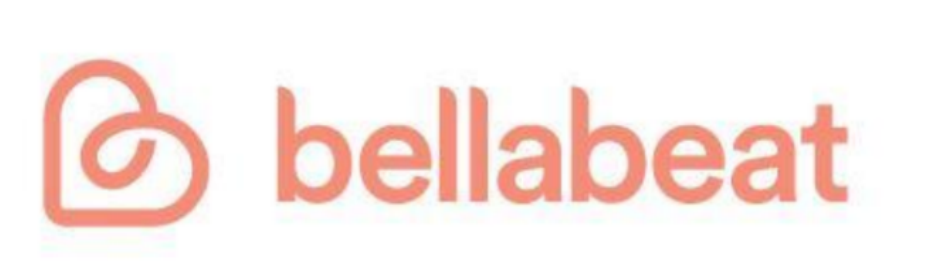</center>

## **Phase I: The Business Task**
The mission of the data analytics team, encompassing six members, is to analyse how individuals are using non-Bellabeat smart devices. 
Urška Sršen, the co-founder of Bellabeat believes analyzing non-Bellabeat smart device usage data trends could provide meaningful insights into the potential marketing strategy of their health-focused smart products and thereby growth opportunities. Consequently, it is expected high-level recommendations are drawn from analysing non-Bellabeat smart device usage. 

### **1.1. All about Bellabeat**
Bellabeat, co-founded in 2014 by Urška Sršen and Sando Muris is a high-tech manufacturer of health-focused products for women that has the potential to become a leading player in the global device market. Bellabeat offers personalized wellness solutions in-sync with womens' menstrual cycles to allow them to reach their fullest potential. 

The primary stakeholders designed a line of smart wellness products that utilise smart technology to track and collect biometric (e.g., heart-rate) plus lifestyle data (e.g., activity). This includes:
* **Leaf tracker**: Can be worn as a bracelet, necklace or clip. Tracks activity, sleep and stress.
* **Time watch**: Classic timepiece that tracks activity, sleep and stress.
* **Spring bottle**: Water bottle that tracks hydration levels.

For more information regarding their products, please click this [link](https://bellabeat.com/shop/). This health information is collected and evaluated against menstrual cycle data, and mindfulness habits within the Bellabeat app designed. Technology-driven solutions are then delivered via the app to women based on the information collected to ensure healthy choices are made. As these devices are specifically engineered to be correlated with women's menstrual cycles, Urška Sršen and Sando Muris are largely considered pioneers in providing a movement towards designing products that offer a holistic, comprehensive and accurate approach to women's health experiences.

### **1.2. How the Business Task will be Addressed**
While there are many smart health-focused products offered by Bellabeat, the Bellabeat app was chosen for review as it is at the heart of the Bellabeat company, connected to the various smart wellness products. 

The business task will be addressed by answering the following questions:
1. What are some trends in smart devise usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy?

## **Phase II: Data Preparation**
### **2.1. All about the Data Source**
The Fitbit Fitness Tracker dataset, made public and available through Mobius, was utilised for the current investigation. It encompasses 18 CSV files with data from thirty eligible Fitbit users between the period of 2016-04-12 and 2016-05-12. Users consented to the collection of personal tracker data information including daily, hourly and minute-level data for physical activity, heart-rate as well as sleep and weight monitoring. 

### **2.2. Credibility of Data**
To check and determine credibility of the data source, the Reliable, Original, Comprehensive, Current and Cited (ROCCC) approach was employed. 
* **Reliability of data:** Reliability limited, with only 30 Fitbit Users included in the dataset. This sampling bias may lead to non-representative or non-meaningful conclusions for the population. Plus, there are some limitations with the datasets to which undermines the reliability of the data (examined further below, see 'Explored Key Tables' summary). 
* **Originallity:** Data was gathered by a third party (Amazon Mechanical Turk). As primary research was not gathered, it is of low originality. 
* **Comprehensive:** Data was reasonably comprehensive. Datasets included daily, hourly and minute-level data, to which is comprehensive for understanding the level of activity individuals were engaged in across days, hours and minutes. However, stress and mindfulness habits were not tracked and the datasets are limited in these respects especially as Bellabeat offers mindfulness and stress tracking. In addition, there was no demographic information collected regarding the participants. Nevertheless, it provides enough data to be within the parameters required for the task at hand. 
* **Current:** Data was sourced in 2016 (7 years ago). While it would be ideal to utlise the most current and dated datasets to elucidate current trends (data sourced within the past three years), the data was still gathered within the range of 10 years and may elucidate some potential trends. 
* **Cited:** The datasets were made available by Mobius on Kaggle and to the author's knowledge, have not been cited. 

Collectively, it is clear the data source would be considered of low quality. Therefore, the following analysis may only be able to highlight some preliminary directions that Bellabeat can take, to which should be verified through an analysis of a larger and much more reliable dataset.

### **2.3. Methodology**
#### **2.3.1. Files Inspected for Relevancy:** 
Out of the 18 CSV files, 4 files were deemed to be relevant for the current analysis. Daily (4 files total) and hourly activity files (3 files) were deemed more relevant to investigating how users use devices than minute-level data as minute-level data may be more appropriate when exploring performance of users. However, upon closer investigation into the hourly data files, it was evident that the hourly time was inconsistent across the month and there were only two days out of the month that were investigated hourly. As such, these were not included. Additionally, the Daily Activity CSV file had already merged information from the Daily intensities, calories, steps files, meaning only the one file of daily activity required importing into 'R'. Files with information tracking sleep and weight (2 files total) were also deemed relevant to explore whether individuals use certain features over others when using non-Bellabeat devices. Heartrate files (1 total) was also relevant as heartrate is a reliable indicator of stress, to which could be correlated against other variables to provide valuable insights for Bellabeat (especially as they often provide solutions for an individuals' stress-level).

#### **2.3.2. Uploaded CSV Files to R:** 
CSV files were then downloaded and imported into 'R'. Datasets were renamed when downloaded with easy, consistent naming conventions for 'R' (e.g., dailyactivity, dailysleep). These files were named within folders that align with this format: 
DailyData_2016_04-05_12.

#### **2.3.3. Installed and Loaded Common Packages and Libraries:** 
Common packages and libraries for data cleaning, processing, analysing and visualizations like tidyverse, here, skimr, janitor were installed and loaded:

In [1]:
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




#### **2.3.4. Imported Datasets and Created Data Frames:** 
To load the data from the imported CSV files, data frames were created for each file: 

In [2]:
dailyactivity <- read.csv("../input/d/daisyicardi/fitbit/dailyactivity.csv")
dailysleep <- read.csv("../input/d/daisyicardi/fitbit/dailysleep.csv")
heartrate <- read.csv("../input/d/daisyicardi/fitbit/heartrateseconds.csv")
weight <- read.csv("../input/d/daisyicardi/fitbit/weightloginfo.csv")

## **Phase III: Data Processing**
This section covers the third phase in data analysis, wherein the steps undertaken to clean, transform and manipulate data are discussed.

### **Methodology:** 
#### **3.1. Explored Data:**
To inspect a short and simple overview of the columns and the first several rows in each data frame, the head function was utilised. This is particularly useful to understand which columns would be of the most interest for the task at hand. It also helps highlight if there are any problems with the data that may need to be sorted and cleaned prior to analysis.

In [3]:
head(dailyactivity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


The columns: total steps, total calories, total distance, very active, moderately active or lightly active distance as well as very active, fairly active or lightly active minutes would be of particular interest for the task at hand. Likewise, the total sedentary minutes in a day column would be of particular interest for this task. The columns related to Id and Activity Date would also be of interest as they correspond to the observations of the individual and the date it occurred over the month. 

Contrastingly, the tracker distance column appears to be a duplicate column of the total distance column, to which could be removed from the data frame. It also appears that the Sedendary Active Distance column as well as the Logged Activities Distance column may not elucidate any particular information, with consistent values of 0, although this will be investigated further when the view function is utilised. 

In [4]:
head(dailysleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


With regard to sleep, all columns aside from the total sleep records columns could provide meaningful insights for Bellabeat. This is because it is unclear what the Boolean values of 1 and 2 mean. Of note however, it appears the sleepday column has both the date and time included within one column. This will perhaps need rectifying later on if want to explore the days of week in which individuals used their trackers the most, or the time in which they were most active on their non-Bellabeat device.

In [5]:
head(heartrate)

,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


All columns of interest. Alike the dailysleep data frame, time and date are formatted within one column in this dataframe. This may need rectifying if want to explore which times individuals were most stressed or which days of the week individuals were most stressed. 

In [6]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


The columns that would be of interest here are related to the weight (in kilograms), fat, BMI and ID as well as date. The weight in pounds is a repeat of information within the kilograms column and therefore could be removed. The 'fat' column also appears to have a lot of NA values, which will potentially require dropping. Likewise, "LogId" column contains irrelevant information for Bellabeat, as a unique Id has already been given. 

#### **3.2. Inspected Data for Errors:**

> **3.2.1. Checked the Internal Structure of Data Frames:** 
To inspect the data for errors, it was deemed necessary to further understand the internal structure of the data frames (e.g., column names) and variables (e.g., whether numerical or character-type data) to elucidate whether any columns required renaming or if any data types included require converting to the appropriate data type. To this aim, the structure function was utilised for all data frames. This function was utilised over the glimpse() and colnames() functions as it provides all the information the output of these functions provide collectively, but in one output only. 

In [7]:
str(dailyactivity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In the dailyactivity data frame, there were 15 columns. Most variables were represented by numerical values (8 variables), with integer values following (6 variables). One variable was represented by character-string type data (the Activity Date). The format of dates within R is often yyyy-mm-dd. As the current activity date column is formatted as mm-dd-yyyy, this was considered problematic among the data analytics team, requiring converting to appropriate date formatting so that the date is recognized by 'R' and can be analysed. There were a few other problematic observations here: the column names for very active distance, **moderately** active distance and **light** active distance are similar to column names very active minutes, **fairly** active minutes and **lightly** active minutes, but also **differed** in minor ways. It is important to keep column names consistent. Therefore, it was considered to rename the column name 'fairly active minutes' to 'moderately active minutes', and the 'light active distance' to be renamed to 'lightly active distance'. Also, all column names have various capitalizations across the variable. It is important to put all variables in lowercase as R is case sensitive. As there will likely be merging of documents, it is important all variables are consistent across data frames.

In [8]:
str(dailysleep)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


The dailysleep data frame has 5 columns. The sleepday column (containing date and time) is represented by character-string data. This requires converting to appropriate date-times formatting. It is unclear what information the total sleep records column provides. As such, it could be dropped from the data frame. 

In [9]:
str(heartrate)

'data.frame':	2483658 obs. of  3 variables:
 $ Id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr  "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: int  97 102 105 103 101 95 91 93 94 93 ...


The heartrate data frame has 3 columns containing Id information, date and time plus the value of the resting heartrate every 5-10 seconds. Date and time again here is represented by character-string data, requiring conversion to date-time formatting. 

In [10]:
str(weight)

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


The weight data frame has 8 columns containing ID information, date and time, weight information (both in kilograms and pounds), fat and BMI information plus the logid as well as information regarding whether the weight was entered in manually or tracked automatically by the Fitbit ('IsManualReport' column). The date and time is entered as character string data, requiring converting to date and time formatting. 

>**3.2.2. Checked for Null or Missing Values:**
To further inspect errors, null or missing values within each data frame were checked. This was achieved by using the is.na() function. 

In [11]:
sum(is.na(dailyactivity))
sum(is.na(dailysleep))
sum(is.na(heartrate))
sum(is.na(weight))

[1] 0

[1] 0

[1] 0

[1] 65

It is clear only the weight data frame appears to have a lot of missing or null values. When we have a deeper look at the null values within the weight data frame, we can see below that a lot of these null values are entered in within the column named 'Fat'. It may mean any conclusions involving body fat may not be as reliable as body 'Fat' was not accurately tracked across all participants. Indeed, only one individual had tracked their body fat twice over the course of the month. The data analytics team therefore deemed it should be dropped from the data frame. 

In [12]:
is.na(weight)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


>**3.2.3. Checked for Duplicate Records:**
Any duplicate records were also checked using the duplicate function. 

In [13]:
sum(duplicated(dailyactivity))
sum(duplicated(dailysleep))
sum(duplicated(heartrate))
sum(duplicated(weight))

[1] 0

[1] 3

[1] 0

[1] 0

While most have no duplicate records within their data frames, the daily sleep data frame has 3 duplicate records which will require removing when cleaning. To investigate the duplicate records further, we can use the get_dupes() function which will show us the exact observations that are considered duplicate records:

In [14]:
get_dupes(dailysleep)

No variable names specified - using all columns.




Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,dupe_count
<dbl>,<chr>,<int>,<int>,<int>,<int>
4388161847,5/5/2016 12:00:00 AM,1,471,495,2
4388161847,5/5/2016 12:00:00 AM,1,471,495,2
4702921684,5/7/2016 12:00:00 AM,1,520,543,2
4702921684,5/7/2016 12:00:00 AM,1,520,543,2
8378563200,4/25/2016 12:00:00 AM,1,388,402,2
8378563200,4/25/2016 12:00:00 AM,1,388,402,2


>**3.2.4. Checked for Unique Id Values:**
As the data source stated that 30 Fitbit Users had consented to being tracked and giving personal information, it is important to cross-check the number of participants that actually took part in Fitbit tracking. To this aim, the n_distinct() function was utilised.  

In [15]:
n_distinct(dailyactivity$Id)
n_distinct(dailysleep$Id)
n_distinct(heartrate$Id)
n_distinct(weight$Id)

[1] 33

[1] 24

[1] 14

[1] 8

It is clear that the dataset description is inconsistent with the dataset itself. 3 more users had been personally tracked than what was described for the dailyactivity data frame. Of note, there are at least 6 individuals that did not have their sleep tracked accurately or there is missing data for these individuals. Likewise, more than 16 (for heartrate) and 22 (for weight) individuals did not have their heartrate or weight accurately tracked, or at least, there is no data for these individuals. This could affect the reliability of conclusions from the analysis.

#### **3.3. Cleaned Data:**
>**3.3.1. Subsetted Data Frames:** Across the data frames, there were a number of columns that do not elucidate any insightful information for the task at hand. It was therefore essential to subset data to pull the most appropriate information for answering the research questions. This was achieved utilising the select() function. Changes were cross-checked utilising the colnames() function. 

In [16]:
dailyactivity <- subset(dailyactivity, select = -c(TrackerDistance, LoggedActivitiesDistance, SedentaryActiveDistance))
weight <- subset(weight, select = -c(WeightPounds, Fat, LogId))

Only the two data frames above required the data analytics team to subset data. The other data frames had included columns that were of interest for the task at hand and did not require subsetting.

>**3.3.2. Renamed Columns, Cleaned Column Names:** It was clear most columns required renaming to better elucidate the information included within the column. This was considered a crucial step not only for readability purposes but also important if files require merging. If files require merging, both primary and foreign keys must be present within a data frame to link and differentiate each other to and from the other. 

In [17]:
dailyactivity <- dailyactivity %>%  
  rename(Daily_Steps=TotalSteps) %>% 
  rename(Daily_Distance=TotalDistance) %>% 
  rename(LightlyActiveDistance=LightActiveDistance) %>% 
  rename(ModeratelyActiveMinutes=FairlyActiveMinutes) %>% 
  rename(Daily_Calories=Calories)  

dailysleep <- dailysleep %>% 
  rename(SleepDate=SleepDay)

heartrate <- heartrate %>% 
  rename(Date_Time=Time) 

weight <- weight %>% 
  rename(Date_Time=Date)

When we cross-check the columns have been renamed correctly, we notice that most files have a date-time component. While the hourly files (hourlycalories/steps/intensities) have a date-time format that is consistent across each other, the date and times within the weight and heartrate files are not consistent. The date-time component within the weight data frame is random, with some individuals manually reporting at different times of the day. The date-time format within the heartrate dataframe, is every 5-10 seconds unlike the hourly date and time component. Therefore, one of the columns was renamed to avoid confusion between data frames if merging all files.

In [18]:
weight <- weight %>% 
  rename(weight_Date_Time=Date_Time) 

Additionally, as R is case and space sensitive, it is important to keep colum names in lower case and consistent of 0 spaces. The clean_names() and rename_with() functions were utilised for this: 

In [19]:
dailyactivity <- rename_with(dailyactivity,tolower) 
dailyactivity <- clean_names(dailyactivity)

dailysleep <- rename_with(dailysleep,tolower) 
dailysleep <- clean_names(dailysleep)

heartrate <- rename_with(heartrate,tolower) 
heartrate <- clean_names(heartrate)

weight <- rename_with(weight,tolower) 
weight <- clean_names(weight)

>**3.3.3. Removed Duplicates:**
Only the dailysleep data frame required duplicates removed. To remove the 3 duplicate records from the data frame, the unique function was utilised. 

In [20]:
dailysleep <- unique(dailysleep)

An operator was assigned to save the function across the whole data frame so that when doing calculations, the duplicate records are not included. To cross-check these were indeed removed, the number of observations within the data frame was checked utilising the nrow() function. 

>**3.3.4. Fixed Date Character-String Data:**
The daily sleep and daily activity data frames had entered dates within one column, formatted as a character string data type. For R to recognise dates, they must be accurately entered in the format in which R recognises dates  especially if want to inspect particular days of the week in which individuals were most active. For R to recognise the dates in the daily activity and daily sleep data frame, the following code was utilised:

In [21]:
dailyactivity$activitydate <- as.Date(dailyactivity$activitydate, format = "%m/%d/%Y")
dailysleep$sleepdate <- as.Date(dailysleep$sleepdate, format = "%m/%d/%Y")

The formatting of the daily activity and daily sleep data frames were cross-checked utilising the head() function. 
> **3.3.5. Fixed Date-Time Character Data:** It is important to note that the weight and heartrate data frame will also require reformatting of their dates. However, as the data frames also have a time component, a different set of codes will be employed for R to recognise the time and date components within the weight and heartrate data frames. The following codes were utilised:

In [22]:
heartrate$date_time <- parse_date_time(heartrate$date_time, "%m/%d/%Y %I:%M:%S %p")
weight$weight_date_time <- parse_date_time(weight$weight_date_time, "%m/%d/%Y %I:%M:%S %p")

#### **3.4. Documentation of Transformation and Manipulation of Data:**
This stage involved merging, grouping, sorting and joining data frames (manipulation of data) as well as involved mutating, separating and/or uniting columns so that information therein can be effectively used for analysis (transformation of data). Questions the data analytics team had informed the subsequent transformation and manipulation of data. 

> **3.4.1. Created a new Data Frame Summarising How Many Days over the Month Individuals used their Device for Specific Features:** To this aim, a new data frame for each data frame (dailyactivity, dailysleep, heartrate and weight) was created to calculate the number of days individuals successively utilised their device for these features. All observations were grouped by ID, and individuals were then classified a light, moderate or high user based on the amount of successive days they utilised their device: 


In [23]:
activity_use <- dailyactivity %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(activity_tracker_usage = case_when(
    days_used < 11 ~ "Light User",
    days_used >= 11 & days_used <= 20 ~ "Moderate User", 
    days_used >= 21 & days_used <= 31 ~ "High User", 
  )) %>%
drop_na()

sleep_use <- dailysleep %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(sleep_tracker_usage = case_when(
    days_used < 11 ~ "Light User",
    days_used >= 11 & days_used <= 20 ~ "Moderate User", 
    days_used >= 21 & days_used <= 31 ~ "High User", 
  )) %>%
drop_na()

heartrate_use <- heartrate %>%
  group_by(id) %>%
  summarize(days_used=sum(n()/86400)) %>%
  mutate(heartrate_tracker_usage = case_when(
    days_used < 11 ~ "Light User",
    days_used >= 11 & days_used <= 20 ~ "Moderate User", 
    days_used >= 21 & days_used <= 31 ~ "High User", 
  ))

weight_use <- weight %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(weight_tracker_usage = case_when(
    days_used < 11 ~ "Light User",
    days_used >= 11 & days_used <= 20 ~ "Moderate User", 
    days_used >= 21 & days_used <= 31 ~ "High User", 
  )) 

> **3.4.2. Merged Usage Data Frame to existing Data Frames:** As the usage data frames above were grouped by 'id', the 'id' column can act as a link to merge data frames together. This is exemplified in the code below. 

In [24]:
dailyactivity_use <- merge(activity_use, dailyactivity, by=c('id'))
dailysleep_use <- merge(sleep_use, dailysleep, by=c('id'))
dailyheartrate_use <- merge(heartrate_use, heartrate, by=c('id'))
dailyweight_use <- merge(weight_use, weight, by=c('id'))

> The data frames developed above will act as the primary data frames within which the data analytics team explore questions further.

> **3.4.3. Added corresponding Weekdays to all Data Frames:**
To understand non-Bellabeat device usage across the days of the week, the data analytics team used the weekdays() function to add a new column containing information of the day of the week to the corresponding date and/or time within the data frame:

In [25]:
dailyactivity_use$weekday <- weekdays(dailyactivity$activitydate)
dailysleep_use$weekday <- weekdays(dailysleep$sleepdate)
dailyheartrate_use$weekday <- weekdays(heartrate$date_time)
dailyweight_use$weekday <- weekdays(weight$weight_date_time)

> The weekdays() function could be utilised as date and time was already classed as either POSIXct or Date rather than characters. If it were still formatted as character string data, the mutate function with the strtime function would have had to been utilised. 

> **3.4.4. Added Content-Specific columns to Data Frames:**
> The content-specific columns added to each data frame are explained in this section below.

>><u>**3.4.4.1.Daily Activity:**</u>

>>Eight content-specific columns were added to the dailyactivity_use data frame: 

>>**1. Added a column for the Total Minutes in which Individuals were Active:** It was clear that while there was a column for the daily total distance of each individual, there was not a column for the daily total minutes in which individuals were active. Therefore, it was important to add this column:

In [26]:
dailyactivity_use <- mutate(dailyactivity_use, daily_active_minutes=veryactiveminutes + moderatelyactiveminutes + lightlyactiveminutes)

>>This column would assist in understanding the total time in which individuals were active, which could then later be compared to how much time they spent sedentary. This could inform the data analytics team as to whether push notifications are necessary for this sample. 

>>**2. Combined Very Active and Moderately Active Minute Columns:** 
According to research funded by the National Institute of Health Research but conducted by [Lee and colleagues (2022)](https://sbgg.org.br/wp-content/uploads/2022/07/1658917123_1_Physical_Activity_Intensity_and_All-Cause.pdf), individuals should aim for exercising for at least 43 minutes each day in moderate physical activity, and 21-43 minutes in vigorous physical activity or an equivalent combination of the two (32-64 minutes) to lower their mortality rate. Given this, it was considered necessary to combine the columns veryactiveminutes and moderatelyactiveminutes to understand whether individuals met these recommendations on a daily basis in the analysis phase:

In [27]:
dailyactivity_use <- mutate(dailyactivity_use, combined_active_mins=veryactiveminutes + moderatelyactiveminutes)

>> **3. Added a Column Categorising whether Individuals Met, Surpassed or did not Meet Combined Activity Recommendations:** As mentioned, it was important to understand whether individuals met these recommendations on a daily basis. The combined_active_mins column was utilised to add another column to determine whether individuals met, surpassed or did not meet these recommendations:

In [28]:
dailyactivity_use <- mutate(dailyactivity_use, activity_recommendations =case_when(
    combined_active_mins < 32 ~ "not met",
    combined_active_mins > 64 ~ "surpassed",
    between(combined_active_mins,32,64) ~ "met"
          )
      )

>> **4. Added a Column Categorising whether Individuals Met, Surpassed or Did not Meet Step Recommendations:** Similarly, while there are no specific distance recommendations for how far an individual should travel on a daily basis (as some individuals may not even be able to step outside of their home for example), step recommendations have been made for decreasing risk of death and/or health problems. According to a recent meta-analysis of 15 international cohorts conducted by [Paluch and colleagues (2022)](https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(21)00302-9/fulltext), individuals under the age of 60 had a decreased risk of death if they walked an average of 8,000 to 10,000 steps on a daily basis. Consequently, a column was added to decipher whether individuals met, surpassed or did not meet these recommendations:

In [29]:
dailyactivity_use <- mutate(dailyactivity_use, step_recommendations =case_when(
    daily_steps > 10000 ~ "surpassed",
    daily_steps < 8000 ~ "not met",
    between(daily_steps,8000,10000) ~ "met",
          )
      )

>> **5. Added Three Columns exploring Wear Trends:** As the dailyactivity data frame was originally comprehensive with minutes allocated to each activity tracked (e.g., very active minutes, sedentary minutes), all these columns were combined to attain the total minutes in which the user wore their device. A percentage was then allocated to the proportion of the day the device was worn. Categories (e.g., if individuals wore their device all day, more than half the day, around half the day or less than half the day) were created to represent the percentages. The following code represents this:

In [30]:
dailyactivity_use <- dailyactivity_use %>% 
  mutate(total_minutes_worn = veryactiveminutes+moderatelyactiveminutes+lightlyactiveminutes+sedentaryminutes) %>%
  mutate(percent_minutes_worn = (total_minutes_worn/1440)*100) %>%
mutate(worn = case_when(
    percent_minutes_worn == 100 ~ "All Day",
    percent_minutes_worn < 100 & percent_minutes_worn >= 60 ~ "More than half day", 
    percent_minutes_worn < 50 & percent_minutes_worn > 0 ~ "Less than half day",
    between(percent_minutes_worn,50,60) ~ "Around half day",
  ))

>><u>**3.4.4.2.Daily Sleep:**</u> One content-specific column was added to the dailysleep data frame:

>>**1. Added a column for Total amount of Time Awake:** It was considered crucial to add a column for the total time awake as the total time in bed column includes total time asleep, which may limit abilities to compare the amount of time individuals spent asleep versus awake:

In [31]:
dailysleep_use <- mutate(dailysleep_use, totaltimeawake= totaltimeinbed-totalminutesasleep)

>> **2. Added a column determining the Sleep Efficiency of Individuals:** Sleep efficiency is often referred to the percentage comparison of time a person is asleep versus the amount of time a person spends in bed.  The percentage is calculated by dividing Total Sleep Time by Total Time in bed. Normal healthy sleep efficiency is considered to be 80% or greater. As such, a column determining individual's sleep efficiency was added. A column categorising whether the percentage obtained was healthy or not was also added:  

In [32]:
dailysleep_use <- mutate(dailysleep_use, sleep_efficiency_percent=totalminutesasleep/totaltimeinbed * 100)

dailysleep_use <- mutate(dailysleep_use, efficiency_type=case_when(
        sleep_efficiency_percent < 80 ~ "Unhealthy",
        sleep_efficiency_percent > 80 ~ "Healthy",
          )
      )

>> **3. Added a Column Categorising whether Individuals had an optimal, moderate or poor sleep:** The data analytics team then added a column categorising whether individuals, had an optimal, moderate or poor sleep on a daily basis. While it is often recommended by medical practitioners that adults sleep between 7-9 hours [(e.g., Olson, 2023)](https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/how-many-hours-of-sleep-are-enough/faq-20057898), research into the physiology of sleep stages, has determined the body cycles through four stages that last approximately 90 minutes long [(Patel et al., 2024)](https://www.ncbi.nlm.nih.gov/books/NBK526132/). Consequently, sleep was defined as either optimal, moderate or poor in accordance with the collective current research:
>>* **An optimal sleep:** was defined in the current research as 7.5 hours or 9 hours of sleep. 
>>* **A moderate sleep:** If adults slept for 7 hours or slept in between 7.5-9 hours, this was considered a moderate sleep. 
>>* **A poor sleep:** If adults slept less than 7 hours or more than 9 hours, this was considered a poor sleep. 

>> The following code represents this:

In [33]:
dailysleep_use <- mutate(dailysleep_use, sleep_type =case_when(
          totalminutesasleep == 540 ~ "optimal",
          totalminutesasleep == 450 ~ "optimal",
          totalminutesasleep > 540 ~ "poor",
          totalminutesasleep < 420 ~ "poor",
          between(totalminutesasleep,421,449) ~ "moderate",
          between(totalminutesasleep,451,539) ~ "moderate",
          )
      )

>>**4. Added a Column Categoring Awake Period Length Recommendations:** The data analytics team also added a column categorising whether individuals had a long, short or normal 'awake' sleep stage. As mentioned, there are four stages of sleep that your body experiences each night. This includes: light sleep, deep sleep (also known as slow wave sleep), REM (rapid eye movement) sleep and awake. The amount of time an individual will spend in each stage varies from night to night. However, companies like [WHOOP](https://www.whoop.com/us/en/thelocker/average-sleep-stages-time/) who monitor their customers' physiological data 24/7, have shown that individuals on average spend:

>>* 3:28-3:59 in Light Sleep (44-51%)
>>* 1:44-2:00 in REM Sleep (22-26%)
>>* 1:23-1:32 in Deep Sleep (17-20%)
>>* 0:43-0:50 Awake (9-11%)

>> While the particular dataset employed could not give insights into the light, REM or deep sleep of individuals, it could give insights into whether individuals spent a longer time or shorter time awake than the average amount of time by members of WHOOP. The following code was employed to this end:

In [34]:
dailysleep_use <- mutate(dailysleep_use, awake_type=case_when(
          totaltimeawake < 43 ~ "short",
          totaltimeawake > 50 ~ "long",
          between(totaltimeawake,43,50) ~ "normal",
          )
       )

>>**5. Added Three Columns exploring Wear Trends:** As the dailysleep data frame had a total column of time individuals spent in bed, this was reframed and inferred as the  the total minutes in which the user wore their device during the night. A percentage was then allocated to the proportion of the night the device was worn. Categories (e.g., if individuals wore their device all night, more than half the night, around half the night or less than half the night) were created to represent the percentages. The following code represents this:

In [35]:
dailysleep_use <- dailysleep_use %>% 
  mutate(total_minutes_worn = totaltimeinbed) %>%
  mutate(percent_minutes_worn = (total_minutes_worn/1440)*100) %>%
mutate(worn = case_when(
    percent_minutes_worn == 100 ~ "All Night",
    percent_minutes_worn < 100 & percent_minutes_worn >= 55 ~ "More than half night", 
    percent_minutes_worn < 50 & percent_minutes_worn > 0 ~ "Less than half night",
    between(percent_minutes_worn,50,55) ~ "Around half night",
  ))

>>This could help the data analytics team understand whether individuals are sleeping properly throughout the night.

>>**<u>3.4.2.3. Heartrate:<u>** 
>> Two content-specific columns were added to the heartrate data frame: 

>> **1. Added an Hourly Time Column:** As the date-time column is already reformatted into date-time components that R can recognise, it is possible to extract the hour of the date-time written so to be able to analyse heartrate values across hours. This code was utilised to this aim:

In [36]:
dailyheartrate_use$time <- format(dailyheartrate_use$date_time, format = "%H")

>>**2. Categorised time as AM or PM:** Understanding the time in which heartrate information is collected could elucidate trends towards when individuals are most stressed or when in the day they are more likely to utilise apps related to heartrate information. The following code was employed:

In [37]:
dailyheartrate_use$time_type <- format(dailyheartrate_use$date_time, format = "%p")

>>**3. Categorised whether the normal heartrate resting value tracked every 5 seconds was low, normal or high:** According to medical practitioners [(e.g., Laskowski, 2022)](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,function%20and%20better%20cardiovascular%20fitness), a normal resting heartrate ranges from 60-100 beats per minute. Generally, a higher heartrate value indicates less efficient heart function and/or cardiovascular health, whereas a lower heartrate value indicates a more efficient heart function (i.e., lower values are rarely of any concern especially if the individual is sporty). Heartrate values are also a reliable indicator of stress. If the value exceeds 100bpm, it is likely an individual is feeling stressed [(Geng, 2023)](https://www.medicalnewstoday.com/articles/average-heart-rate-when-stressed#normal-heart-rate). A code to differentiate if the heartrate value was low, normal or high was therefore developed within these conditions:

In [38]:
dailyheartrate_use <- mutate(dailyheartrate_use, value_type=case_when(
          value < 60 ~ "low",
          value > 100 ~ "high",
          between(value,60,100) ~ "normal",
          )
      )

>><u>**3.4.2.4.Weight:**</u> One content-specific column similar to the heartrate data frame was added to the weight data frame: 

>> **1. Added an Hourly Time Column:** As the date-time column is already reformatted into date-time components that R can recognise, it is possible to extract the hour of the date-time written so to be able to analyse what times individuals are usually manually reporting weight data. This code was utilised to this aim:

In [39]:
dailyweight_use$time <- format(dailyweight_use$weight_date_time, format = "%H")

>>**2. Categorised time as AM or PM:** Understanding the time in which weight information is collected could elucidate trends towards when individuals are more likely to utilise apps related to weight information. The following code was employed:

In [40]:
dailyweight_use$time_type <- format(dailyweight_use$weight_date_time, format = "%p")

>>**3. Categorised Individuals' BMI (Body Mass Index) as Underweight, Healthy or Overweight:** As BMI is a more reliable indicator of an individual's risk for weight-related health diseases than fat percentage, it was important to categorise what an individuals BMI was. According to the [Centers for Disease Control and Prevention (2022)](https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.), if your BMI:

>>* Is less than 18.5: Considered underweight. 
>>* Is 18.5 to <25: Considered a healthy weight range.
>>* Is 25.0 to <30: Considered the overweight range.
>>* Is 30.0 or higher: falls within the obesity range.

>> The following code represents how this column was added to the dailyweight_use data frame.

In [41]:
dailyweight_use <- mutate(dailyweight_use, bmi_type=case_when(
          bmi < 18.5 ~ "Underweight",
          bmi > 30 ~ "Obese",
          between(bmi,18.5,25) ~ "Healthy",
          between(bmi,25,30) ~ "Overweight"
          )
      )

> **3.4.5. Transformed Newly Added Columns in each Data Frame into Variables:** To this aim, the factor function was utilised:

In [42]:
# Daily Activity Data Frame:
dailyactivity_use$activity_tracker_usage <- factor(dailyactivity_use$activity_tracker_usage, 
                                                   levels=c("High User", "Moderate User", "Light User"))
dailyactivity_use$activity_recommendations <- factor(dailyactivity_use$activity_recommendations, 
                                                     levels=c("met", "not met", "surpassed"))
dailyactivity_use$step_recommendations <- factor(dailyactivity_use$step_recommendations, 
                                                 levels=c("met", "not met", "surpassed"))
dailyactivity_use$weekday <- factor(dailyactivity_use$weekday, levels= c("Monday", 
    "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dailyactivity_use$worn <- factor(dailyactivity_use$worn, levels= c("All Day", 
    "More than half day", "Less than half day", "Around half day"))

# Daily Sleep Data Frame: 
dailysleep_use$sleep_tracker_usage <- factor(dailysleep_use$sleep_tracker_usage, 
                                             levels=c("High User", "Moderate User", "Light User"))
dailysleep_use$sleep_type <- factor(dailysleep_use$sleep_type, ordered=FALSE, 
                                    levels=c("optimal", "moderate", "poor"))
dailysleep_use$awake_type <- factor(dailysleep_use$awake_type, ordered=FALSE, 
                                    levels= c("short", "long", "normal"))
dailysleep_use$efficiency_type <- factor(dailysleep_use$efficiency_type, 
                                         levels= c("Unhealthy", "Healthy"))
dailysleep_use$weekday <- factor(dailysleep_use$weekday, levels= c("Monday", 
    "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dailysleep_use$worn <- factor(dailysleep_use$worn, 
                              levels= c("All night", "More than half night", "Less than half night", "Around half night"))

# Heartrate Data Frame: 
dailyheartrate_use$heartrate_tracker_usage <- factor(dailyheartrate_use$heartrate_tracker_usage, 
                                                     levels=c("High User", "Moderate User", "Light User"))
dailyheartrate_use$weekday <- factor(dailyheartrate_use$weekday, 
                                     levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dailyheartrate_use$value_type <- factor(dailyheartrate_use$value_type, 
                                       levels= c("low", "high", "normal"))
dailyheartrate_use$time_type <- factor(dailyheartrate_use$time_type, levels= c("AM", 
    "PM"))

# Weight Data Frame: 
dailyweight_use$weight_tracker_usage <- factor(dailyweight_use$weight_tracker_usage, 
                                               levels=c("High User", "Moderate User", "Light User"))
dailyweight_use$weekday <- factor(dailyweight_use$weekday, 
                                  levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dailyweight_use$bmi_type <- factor(dailyweight_use$bmi_type, 
                                   levels= c("Underweight","Obese", "Healthy", "Overweight"))
dailyweight_use$time_type <- factor(dailyweight_use$time_type, levels= c("AM", 
    "PM"))
dailyweight_use$ismanualreport <- factor(dailyweight_use$ismanualreport, levels= c("True", "False"))

## **Phase IV: Analysis Phase**
This section covers the answers to the questions the data analytics team sought to answer in detail plus any additional questions that arise. This stage involved exploring data first. Trends and relationships of the dataframes were then evaluated both individually and/or in combination with each other. A descriptive summary of each output is reported and a summary of the intepretation of findings follows subsequently. 

### **4.1. Daily Activity Descriptive Findings:**
This section will cover the health-related descriptive findings as well as the wear and use related descriptive findings of the dailyactivity data frame. 

#### **4.1.1. Health-related Descriptive Findings:**
> **<u>1. Daily Steps and Distance taken plus Calories Burned:<u>** Exploration into summary statistics regarding these columns highlighted:

In [43]:
dailyactivity_use %>%
select(daily_steps, daily_distance, daily_calories) %>%
summary()

  daily_steps    daily_distance   daily_calories
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

* Across the 940 observations within the month of April 2016-May 2016 and the 33 Fitbit users, individuals on average took 7,638 steps on a daily basis, traveled an average distance of 5.49 (miles/km) and burned 2,304 calories a day on average. 
* At a maximum, users made 36,019 steps in a day, traveled 28.03 (miles/km), and burned 4,900 calories in a day within the month. 
* At a minimum, users took 0 steps, traveled 0 miles/km and burned 0 calories. Similarly, at a minimum, individuals spent 0 minutes active or 0 minutes sedentary in a day. 
    
> **<u>2. Distance Travelled:<u>** 
Closer inspection of the average distance traveled within the month across all 33 individuals showed:

In [44]:
dailyactivity_use %>%
select(veryactivedistance, moderatelyactivedistance, lightlyactivedistance) %>%
summary()

 veryactivedistance moderatelyactivedistance lightlyactivedistance
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.000       
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 1.945       
 Median : 0.210     Median :0.2400           Median : 3.365       
 Mean   : 1.503     Mean   :0.5675           Mean   : 3.341       
 3rd Qu.: 2.053     3rd Qu.:0.8000           3rd Qu.: 4.782       
 Max.   :21.920     Max.   :6.4800           Max.   :10.710       

**_Descriptive Summary across the 940 observations:_**
* Across the 33 users, individuals covered an average of 1.50 (miles/km) at a very active pace and at a maximum, 21.92 (miles/km) at a very active pace. 
* Individuals covered an average of 0.57 (miles/km) at a moderately active pace, and 6.48 (miles/km) at a maximum in a moderately active pace. 
* Individuals covered an average of 3.34 (miles/km) at a lightly active pace, and at a maximum, 10.710 (miles/km) at a lightly active pace. 
    
<u>**Interpretive Summary:**<u>
* Individuals were mostly traveling distances at a lightly active pace, followed by a very active pace. 
* Individuals spent the least amount of time traveling distances at a moderately active pace. 
    
> <u>**3. Minutes Spent in Daily Activity plus Minutes Spent in Vigorous, Moderate, Light or Sedentary Activity:**<u>
    
> Inspection of the amount of time the 33 individuals were engaged in activity in general plus in very active, moderately active or lightly active activities on a daily basis across the month revealed:

In [45]:
dailyactivity_use %>%
select(daily_active_minutes, sedentaryminutes, veryactiveminutes, moderatelyactiveminutes, lightlyactiveminutes, combined_active_mins) %>%
summary()

 daily_active_minutes sedentaryminutes veryactiveminutes
 Min.   :  0.0        Min.   :   0.0   Min.   :  0.00   
 1st Qu.:146.8        1st Qu.: 729.8   1st Qu.:  0.00   
 Median :247.0        Median :1057.5   Median :  4.00   
 Mean   :227.5        Mean   : 991.2   Mean   : 21.16   
 3rd Qu.:317.2        3rd Qu.:1229.5   3rd Qu.: 32.00   
 Max.   :552.0        Max.   :1440.0   Max.   :210.00   
 moderatelyactiveminutes lightlyactiveminutes combined_active_mins
 Min.   :  0.00          Min.   :  0.0        Min.   :  0.00      
 1st Qu.:  0.00          1st Qu.:127.0        1st Qu.:  0.00      
 Median :  6.00          Median :199.0        Median : 21.00      
 Mean   : 13.56          Mean   :192.8        Mean   : 34.73      
 3rd Qu.: 19.00          3rd Qu.:264.0        3rd Qu.: 57.00      
 Max.   :143.00          Max.   :518.0        Max.   :275.00      

* The sample spent on average 227.5 minutes active on a daily basis, but spent on average 991.2 minutes sedentary on a daily basis across the whole month. The maximum amount of time individuals spent active was 552 minutes daily within the month. This is in stark contrast to the maximum amount of time individuals spent sedentary in a day within the month (1,440 minutes). 
* In total, individuals on average spent 21.16 minutes in vigorous activity, 13.56 minutes in activity at a moderate pace, and 192.8 minutes in activity at a lightly active pace. 
* At a maximum, individuals spent 210 minutes in vigorous activity, 143 minutes in activity at a moderately active pace, and 518 minutes in activity at a lightly active pace. At a minimum, individuals spent 0 minutes in very active, moderately active or lightly active activities. 
* Individuals spent a combined average of 34.73 minutes in vigorous and activity at a moderate pace. At a maximum, they engaged in a combination of vigorous and moderately active activities for 275 minutes. At a minimum, individuals spent 0 minutes in combined vigorous and moderate activity.

#### **4.1.2. Wear and Use of App related Descriptive Findings:**
> **<u>1. Length of Time Individuals Wore their Devices:<u>** Minutes individuals wore their devices as well as the equivalent percentage of the day are as below. Additionally, as the length of time and percentage of the day individuals wore their devices was created into a categorical variable to explore how many times individuals wore their device for a respective length of time, this will also be summarised below. 

In [46]:
dailyactivity_use %>%
select(worn, total_minutes_worn, percent_minutes_worn) %>%
summary()

                 worn     total_minutes_worn percent_minutes_worn
 All Day           :478   Min.   :   2.0     Min.   :  0.1389    
 More than half day:408   1st Qu.: 989.8     1st Qu.: 68.7326    
 Less than half day: 25   Median :1440.0     Median :100.0000    
 Around half day   : 29   Mean   :1218.8     Mean   : 84.6356    
                          3rd Qu.:1440.0     3rd Qu.:100.0000    
                          Max.   :1440.0     Max.   :100.0000    

* On average, individuals wore their devices for 1218 minutes (20.3 hours). This, on average, equates to 84.6% of the day. 
* At a maximum, individuals wore their devices for 1440 minutes (24 hours), which is 100% of the day. 
* At a minimum, individuals wore their devices for 2 minutes (equivalent of 0.1%).
* Indeed, the categorical variable 'worn' is consistent with total and average information. The majority of individuals wore their devices all day (478 observations), followed by more than half a day (408 observations). Hardly any observations were made with individuals wearing their devices for around half the day (29 observations) or less than half the day (25 observations). 

> **<u>2. App Usage Characteristics:<u>** A summary of when individuals used their devices the most, as well as for how many days is provided below. Further, a summary of the amount of observations that classified a user as a high, moderate or light user is also provided.

In [47]:
dailyactivity_use %>%
select(weekday, activity_tracker_usage, days_used) %>%
summary()

      weekday      activity_tracker_usage   days_used    
 Monday   :120   High User    :879        Min.   : 4.00  
 Tuesday  :152   Moderate User: 57        1st Qu.:30.00  
 Wednesday:150   Light User   :  4        Median :31.00  
 Thursday :147                            Mean   :29.57  
 Friday   :126                            3rd Qu.:31.00  
 Saturday :124                            Max.   :31.00  
 Sunday   :121                                           

* Most observations for activity were taken on a Tuesday, followed by Wednesday and Thursday. Monday was the day in which least observations were collected over the month. 
* On average, individuals used their trackers for 29 days. At a maximum, individuals used their trackers everyday over the course of month and at a minimum, individuals used their devices for 4 days.
* As such, the majority of individuals in the current sample would be considered high users, meaning these individuals used their trackers for more than 20 days in a row over the month. Indeed, 879 observations were collected from these individuals. 57 observations were collected from those considered moderate users, whereas 4 observations were collected from those considered light users. 

### **4.2. Daily Sleep Descriptive Findings:**
This section will cover the health-related descriptive findings as well as the wear and use related descriptive findings of the dailysleep data frame.

#### **4.2.1. Health-related Descriptive Findings:**
> **<u>1. Time individuals spent awake, asleep, and in bed as well as amount of sleep records:<u>** Summary statistics are below.

In [48]:
dailysleep_use %>%
select(totalsleeprecords, totalminutesasleep, totaltimeinbed, totaltimeawake) %>%
summary()

 totalsleeprecords totalminutesasleep totaltimeinbed  totaltimeawake  
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0   Min.   :  0.00  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8   1st Qu.: 17.00  
 Median :1.00      Median :432.5      Median :463.0   Median : 25.50  
 Mean   :1.12      Mean   :419.2      Mean   :458.5   Mean   : 39.31  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0   3rd Qu.: 40.00  
 Max.   :3.00      Max.   :796.0      Max.   :961.0   Max.   :371.00  

**_Descriptive Summary across the 410 observations:_**
* On average, users slept for a total amount of 419 minutes (6.98 hours). They spent on average 458 minutes (7.6 hours) in bed and 39.31 minutes awake on average across the whole month. 
* At a maximum, users slept for 796 minutes (13.26 hours), spent 961 minutes (16.01 hours) in bed and 371 minutes (6.18 hours) awake. 
* On average, users did not have interrupted sleep and only were required to fall asleep once. At a maximum, users were interrupted 3 times during their sleep, wherein users had to attempt to fall asleep again 3 times in the night. 

#### **4.2.2. Wear and Use of App related Descriptive Findings:**
> **<u>1. Length of Time Individuals Wore their Devices:<u>** Minutes individuals wore their devices as well as the equivalent percentage of the night are as below. Additionally, as the length of time and percentage of the night individuals wore their devices was created into a categorical variable to explore how many times individuals wore their device for a respective length of time, this will also be summarised below. 

In [49]:
dailysleep_use %>%
select(total_minutes_worn, percent_minutes_worn, worn) %>%
summary()

 total_minutes_worn percent_minutes_worn                   worn    
 Min.   : 61.0      Min.   : 4.236       All night           :  0  
 1st Qu.:403.8      1st Qu.:28.038       More than half night:  5  
 Median :463.0      Median :32.153       Less than half night:402  
 Mean   :458.5      Mean   :31.839       Around half night   :  3  
 3rd Qu.:526.0      3rd Qu.:36.528                                 
 Max.   :961.0      Max.   :66.736                                 

* The average individuals wore their tracking devices for was 458 minutes (7.63 hours). At a maximum, individuals wore their devices for 961 minutes (16 hours). At a minimum, they wore their tracking devices for 61 minutes (1 hour). 
* On average, individuals wore their tracking devices for 31% of the night. At a maximum, they wore their devices for 66% of the night. At a minimum, they wore their devices for 4% of the night.
* Indeed, most observations recorded individuals wore their device for less than half the night (402 observations). No individual wore their device all night. Additionally, only 5 observations were recorded for individuals who wore their devices all night. Similarly, only 3 observations were recorded for individuals who wore their devices around half the night. 

> **<u>2. App Usage Characteristics:<u>** A summary of when individuals used their apps the most for sleep, as well as for how many days is provided below. Further, a summary of the amount of observations that classified a user as a high, moderate or light user is also provided. 

In [50]:
dailysleep_use %>%
select(weekday, days_used, sleep_tracker_usage) %>%
summary()

      weekday     days_used        sleep_tracker_usage
 Monday   :46   Min.   : 1.00   High User    :328     
 Tuesday  :65   1st Qu.:23.00   Moderate User: 48     
 Wednesday:66   Median :26.00   Light User   : 34     
 Thursday :64   Mean   :24.35                         
 Friday   :57   3rd Qu.:28.00                         
 Saturday :57   Max.   :31.00                         
 Sunday   :55                                         

* Throughout the month, most observations regarding sleep were collected on a Wednesday, followed by Tuesday and then Thursday. Monday was the day of the week in which the least observations regarding sleep were collected. 
* On average, individuals used their devices for 24 days. At a maximum, individuals used their devices every day across the month (31 days), whereas at a minimum, utilised the device for 1 day.
* Consequently, most individuals were considered high users when tracking sleep (328 observations collected). Comparingly, little difference exists in the number of observations collected from moderate (48 observations collected) and light users (34 observations). 

### **4.3. Daily Heartrate Descriptive Findings:**
This section will cover the health-related descriptive findings as well as the wear and use related descriptive findings of the heartrate data frame.

#### **4.3.1. Health-related Descriptive Findings:**

In [51]:
dailyheartrate_use %>%
select(value, value_type) %>%
summary()

     value         value_type     
 Min.   : 36.00   low   : 373015  
 1st Qu.: 63.00   high  : 270841  
 Median : 73.00   normal:1839802  
 Mean   : 77.33                   
 3rd Qu.: 88.00                   
 Max.   :203.00                   

**_Descriptive Summary across the 2,483,658 observations:_**
* On average, individuals had a resting heart rate value of 77. At a minimum, they had a resting heart rate value of 36, whereas, at a maximum, individuals had a resting heart rate value of 203.
* The majority of observations regarding heartrate values collected from individuals were within normal range (60-100bpm). Higher heartrate values were values least collected among individuals.
    
#### **4.3.2. App-related Descriptive Findings:**

In [52]:
dailyheartrate_use %>%
select(weekday, days_used, time_type, heartrate_tracker_usage) %>%
summary()

      weekday         days_used       time_type     heartrate_tracker_usage
 Monday   :289764   Min.   :0.02882   AM:1072122   High User    :      0   
 Tuesday  :452381   1st Qu.:1.83911   PM:1411536   Moderate User:      0   
 Wednesday:399232   Median :2.87685                Light User   :2483658   
 Thursday :359146   Mean   :2.50391                                        
 Friday   :357594   3rd Qu.:2.95340                                        
 Saturday :338394   Max.   :3.30395                                        
 Sunday   :287147                                                          

### **4.4. Daily Weight Descriptive Findings:**
This section will cover the health-related descriptive findings as well as app-related descriptive findings of the weight data frame.

#### **4.4.1. Health-related Descriptive Findings:**

In [53]:
dailyweight_use %>%
select(weightkg, bmi, bmi_type) %>%
summary()

    weightkg           bmi               bmi_type 
 Min.   : 52.60   Min.   :21.45   Underweight: 0  
 1st Qu.: 61.40   1st Qu.:23.96   Obese      : 1  
 Median : 62.50   Median :24.39   Healthy    :34  
 Mean   : 72.04   Mean   :25.19   Overweight :32  
 3rd Qu.: 85.05   3rd Qu.:25.56                   
 Max.   :133.50   Max.   :47.54                   

**_Descriptive Summary across the 67 observations:_**
* On average, individuals were 72.04 kg, and at a maximum 133.50 kg. 
* On average, individuals had a BMI (body mass index) of 25.19 and at a maximum, had a BMI of 47.54. 
* Around half the observations (50.7%) of the BMI collected from individuals would be considered within the healthy range. However, approximately half of the observations (47.8%), of individuals BMI could also be considered within the overweight range. Around 1.5% of observations were classified within the obese range. 

#### **4.4.2. App-related Descriptive Findings:**

In [54]:
dailyweight_use %>%
select(weight_tracker_usage, weekday, time_type, days_used, ismanualreport) %>%
summary()

    weight_tracker_usage      weekday   time_type   days_used    
 High User    :54        Monday   :12   AM:25     Min.   : 1.00  
 Moderate User: 0        Tuesday  : 9   PM:42     1st Qu.:24.00  
 Light User   :13        Wednesday:12             Median :24.00  
                         Thursday :11             Mean   :22.61  
                         Friday   : 6             3rd Qu.:30.00  
                         Saturday : 7             Max.   :30.00  
                         Sunday   :10                            
 ismanualreport
 True :41      
 False:26      
               
               
               
               
               

**_Descriptive Summary across the 67 observations:_**
* The majority of observations collected classified users as high users, as users utilised their device for an average of 22.61 days over the course of the month. At a maximum, they utilised the weight app for 30 days over the course of the month. Contrastingly, a smaller proportion of observations classified users as light users. This may be due to the fact that the minimum amount of days in which individuals utilised their weight app was 1 day.
* Most observations were collected on Mondays and Wednesday equally (12 observations). Thursday followed (11 observations), with Sunday close behind (10 observations). The least amount of observations were collected on Friday (6 observations).
* Most observations were collected in the afternoon (42 observations) in comparison to morning (25 observations). 
* More than half of the observations (61.2%) were entered in manually. Contrastingly, less than half (38%) of observations were entered in automatically. 



### **4.5. Investigated Trends**
In this stage, various queries were explored by transforming and manipulating data as well as performing calculations. Each question is analysed individually with documentation of manipulation of data. Interesting trends with visualisations are then highlighted.

#### **4.5.1. App Use Trends:** 

> **Question 1: How Many Individuals are High, Moderate or Light Users of Activity, Sleep, Heartrate and Weight app features?**

> To explore this, the usage data frames created that grouped data by ID and classed individuals as a light, moderate or high user based on the amount of successive days they utilised their device were employed to perform calculations:

In [55]:
# Created Variables for the number of Users Classifying as High Users across all data frames:
activity_high_use <- sum(activity_use$activity_tracker_usage == 'High User')
sleep_high_use <- sum(sleep_use$sleep_tracker_usage == 'High User')
heartrate_high_use <- sum(heartrate_use$heartrate_tracker_usage == 'High User')
weight_high_use <- sum(weight_use$weight_tracker_usage == 'High User')

# Created Variables for the number of Users Classifying as Moderate Users across all data frames:
activity_moderate_use <- sum(activity_use$activity_tracker_usage == 'Moderate User')
sleep_moderate_use <- sum(sleep_use$sleep_tracker_usage == 'Moderate User')
heartrate_moderate_use <- sum(heartrate_use$heartrate_tracker_usage == 'Moderate User')
weight_moderate_use <- sum(weight_use$weight_tracker_usage == 'Moderate User')

# Created Variables for the number of Users Classifying as Light Users across all data frames:
activity_light_use <- sum(activity_use$activity_tracker_usage == 'Light User')
sleep_light_use <- sum(sleep_use$sleep_tracker_usage == 'Light User')
heartrate_light_use <- sum(heartrate_use$heartrate_tracker_usage == 'Light User')
weight_light_use <- sum(weight_use$weight_tracker_usage == 'Light User')

# Created New Data Frames for existing Data Frames to Aggregate all Variables above:
activity_usage <- data.frame(use = c("High User", "Moderate User", "Light User"),
                            total_users = c(activity_high_use, activity_moderate_use, activity_light_use))
sleep_usage <- data.frame(use = c("High User", "Moderate User", "Light User"),
                            total_users = c(sleep_high_use, sleep_moderate_use, sleep_light_use))
heartrate_usage <- data.frame(use = c("High User", "Moderate User", "Light User"),
                            total_users = c(heartrate_high_use, heartrate_moderate_use, heartrate_light_use))
weight_usage <- data.frame(use = c("High User", "Moderate User", "Light User"),
                            total_users = c(weight_high_use, weight_moderate_use, weight_light_use))

# Created Percentages of Sample that were High, Moderate or Light Users: 
activity_usage_percent <- round(100 * activity_usage$total_users/33)
sleep_usage_percent <- round(100 * sleep_usage$total_users/24)
heartrate_usage_percent <- round(100 * heartrate_usage$total_users/14)
weight_usage_percent <- round(100 * weight_usage$total_users/8)

# Added Percentage Values to New Usage Data Frames:
activity_usage <- mutate(activity_usage, sample_percentage=paste(activity_usage_percent, "%"))
sleep_usage <- mutate(sleep_usage, sample_percentage=paste(sleep_usage_percent, "%"))
heartrate_usage <- mutate(heartrate_usage, sample_percentage=paste(heartrate_usage_percent, "%"))
weight_usage <- mutate(weight_usage, sample_percentage=paste(weight_usage_percent, "%"))

# Parsed Percentages so R recognises the numbers:
activity_usage <- mutate(activity_usage, total_percent=parse_number(activity_usage$sample_percentage))
sleep_usage <- mutate(sleep_usage, total_percent=parse_number(sleep_usage$sample_percentage))
heartrate_usage <- mutate(heartrate_usage, total_percent=parse_number(heartrate_usage$sample_percentage))
weight_usage <- mutate(weight_usage, total_percent=parse_number(weight_usage$sample_percentage))

> **Question 2: What Proportion of the Day are Individuals tracking Sedentary, Light, Moderate or Very Active Activity?**

> To answer this question, calculations were made to turn minute-level data into hourly data. These calculations were then added to a new data frame: 

In [56]:
# Calculations to turn minute-level data to hourly data
sedentary_hours <- sum(dailyactivity_use$sedentaryminutes/1440)
veryactive_hours <- sum(dailyactivity_use$veryactiveminutes/1440)
moderate_hours <- sum(dailyactivity_use$moderatelyactiveminutes/1440)
light_hours <- sum(dailyactivity_use$lightlyactiveminutes/1440)

# Created a new data frame
activity_hours <- data.frame(Hours_Spent = c("Sedentary", "Very Active","Moderately Active", "Lightly Active"),
  Total_Hours = c(sedentary_hours, veryactive_hours, moderate_hours, light_hours))

# Calculated percentage of hours and added these to the newly created data frame
activity_percentages <- round(100 * activity_hours$Total_Hours/sum(activity_hours$Total_Hours),1)
activity_hours <- mutate(activity_hours, Month_Percentage=paste(activity_percentages, "%"))

> **Question 3: What Days of the Week are Individuals tracking Activity, Sleep, Heartrate and Weight the most?**

> To answer this question, observations were first grouped by weekday and then a new data frame was created to explore trends:

In [57]:
# Grouped number of observations per weekday, summarising number of observations
weekday_activity_use <- dailyactivity_use %>%
  group_by(weekday) %>%
  summarize(activity_tracked=sum(n()))

weekday_sleep_use <- dailysleep_use %>%
  group_by(weekday) %>%
  summarize(sleep_tracked=sum(n()))

weekday_heartrate_use <- dailyheartrate_use %>%
  group_by(weekday) %>%
  summarize(heartrate_tracked=sum(n()))

weekday_weight_use <- dailyweight_use %>%
  group_by(weekday) %>%
  summarize(weight_tracked=sum(n()))

#Created a new data frame merging all these new vectors created
explore_weekday <- data.frame(weekday = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"), 
                                          weekday_activity_use, weekday_sleep_use, weekday_heartrate_use, weekday_weight_use)

# Removed duplicate information
explore_weekday <- explore_weekday %>% select(- weekday.1, - weekday.2, - weekday.3, - weekday.4)

explore_weekday

weekday,activity_tracked,sleep_tracked,heartrate_tracked,weight_tracked
<chr>,<int>,<int>,<int>,<int>
Monday,120,46,289764,12
Tuesday,152,65,452381,9
Wednesday,150,66,399232,12
Thursday,147,64,359146,11
Friday,126,57,357594,6
Saturday,124,57,338394,7
Sunday,121,55,287147,10


> **Question 4: What Proportion of Individuals are entering their Heartrate values in the AM versus PM?**

> To answer this question, observations were first grouped by time type (i.e., either AM/PM) and then a new data frame was created to explore trends:

In [58]:
heartrateampm <- dailyheartrate_use %>%
group_by(time_type) %>%
summarize(id = sum(n_distinct(id)))

heartrateampm

time_type,id
<fct>,<int>
AM,14
PM,14


> **Question 5: What Proportion of Individuals were entering their Weight values manually versus non-Manually?**

> To answer this question, observations were first grouped by whether individuals reporting manually or non-manually and then the number of distinct ID values were added to a new data frame to explore trends:

In [59]:
weightreporting <- dailyweight_use %>% 
group_by(ismanualreport) %>% 
summarize(id = sum(n_distinct(id))) %>% 
mutate(percent =(id/8)*100)

weightreporting

ismanualreport,id,percent
<fct>,<int>,<dbl>
True,5,62.5
False,3,37.5


> **Question 6: Are individuals manually entering weight values mostly in the AM or PM?**

> To answer this question, observations were first grouped by time type (i.e., either AM/PM) and then reframed into whether individuals reported manually or automatically:

In [60]:
weighttime <- dailyweight_use %>%
group_by(time_type) %>%
reframe(ismanualreport)

weighttime

time_type,ismanualreport
<fct>,<fct>
AM,False
AM,False
AM,False
AM,False
AM,False
AM,False
AM,False
AM,False
AM,False


> **Question 7: What Proportion of Individuals are entering their Weight values in the AM versus PM?**

> To answer this question, observations were first grouped by time type (i.e., either AM/PM) and then a new data frame was created to explore trends:

In [61]:
weightampm <- dailyweight_use %>% 
group_by(time_type) %>% 
summarize(id = sum(n_distinct(id))) %>% 
mutate(percent = (id/8)*100)

weightampm

time_type,id,percent
<fct>,<int>,<dbl>
AM,3,37.5
PM,6,75.0


In [62]:
ismanual <- dailyweight_use %>% 
group_by(id) %>% 
summarize(ismanual = sum(ismanualreport == 'True'))

isnotmanual <- dailyweight_use %>% 
group_by(id) %>% 
summarize(isnotmanual = sum(ismanualreport == 'False'))

isnotmanual
ismanual

id,isnotmanual
<dbl>,<int>
1503960366,0
1927972279,1
2873212765,0
4319703577,0
4558609924,0
5577150313,1
6962181067,0
8877689391,24


id,ismanual
<dbl>,<int>
1503960366,2
1927972279,0
2873212765,2
4319703577,2
4558609924,5
5577150313,0
6962181067,30
8877689391,0


#### **4.5.2. Daily Activity Health Trends:** 

> **Question 1: How Many Times did each Individual meet Step Health Recommendations over the course of the Month?**

> To answer this question, values of observations were first grouped by id and saved to a new data frame:

In [63]:
# Counted the number of observations wherein individuals met, surpassed or did not meet recommendations by grouping by id
step_met_recs <- dailyactivity_use %>% 
group_by(id) %>% 
summarize(met_recommendations = sum(step_recommendations == 'met'))

step_surpassed <- dailyactivity_use %>% 
group_by(id) %>% 
summarize(surpassed_recs = sum(step_recommendations == 'surpassed'))

step_notmet_recs <- dailyactivity_use %>% 
group_by(id) %>% 
summarize(notmet_recs = sum(step_recommendations == 'not met'))

# Merged data frames by id
mergedmetsurpassed <- merge(step_met_recs, step_surpassed, by=c("id"))
mergedsteprecs <- merge(mergedmetsurpassed, step_notmet_recs, by=c("id"))

mergedsteprecs

id,met_recommendations,surpassed_recs,notmet_recs
<dbl>,<int>,<int>,<int>
1503960366,3,27,1
1624580081,4,2,25
1644430081,6,7,17
1844505072,1,0,30
1927972279,0,0,31
2022484408,1,27,3
2026352035,3,3,25
2320127002,0,1,30
2347167796,3,9,6


> **Question 2: On Average, How Many Individuals met Step Health Recommendations over the course of the Month?**

> To answer this question, average values of observations were first grouped by id and saved to a new data frame:

In [64]:
# Created a vector for the average steps each individual took over the course of the month
steprecs_avg <- dailyactivity_use %>% 
group_by(id) %>%
summarise(avg_steps=mean(daily_steps))

# Categorised whether individuals surpassed, met or did not meet recommendations based on health guidelines
steprecs_avg <- mutate(steprecs_avg, step_recommendations =case_when(
    avg_steps > 10000 ~ "surpassed",
    avg_steps < 8000 ~ "not met",
    between(avg_steps,8000,10000) ~ "met",
          )
      )

# Summarised the number of individuals surpassing, meeting or not meeting recommendations
steprecs <- steprecs_avg %>%
summarize(surpassed = sum(step_recommendations == 'surpassed'),
         met = sum(step_recommendations == 'met'),
         not_met = sum(step_recommendations == 'not met'))

# Created a new data frame with added calculations
explore_steprecs <- data.frame(steprecs=c('surpassed', 'met', 'not_met'),
                               sample_number=c('7','7','19'))

# Parsed character data as numerical data so R recognises the numbers
explore_steprecs <- explore_steprecs %>%
mutate(across(contains(c("sample_number")), parse_number))

# Created a sample percentage
explore_steprecs <- explore_steprecs %>% 
mutate(sample_percent=round(100 * explore_steprecs$sample_number/33))

explore_steprecs

steprecs,sample_number,sample_percent
<chr>,<dbl>,<dbl>
surpassed,7,21
met,7,21
not_met,19,58


> **Question 3: On Average, How Many Individuals met Activity Health Recommendations over the course of the Month?**

> To answer this question, average values of observations were first grouped by id and saved to a new data frame:

In [65]:
# Created a vector for the average combined minutes individual were active over the course of the month
combinedactivity_avg <- dailyactivity_use %>% 
group_by(id) %>%
summarise(avg_combined_active_mins=mean(combined_active_mins))

# Categorised whether individuals surpassed, met or did not meet recommendations based on health guidelines
combinedactivity_avg <- mutate(combinedactivity_avg, activity_recommendations =case_when(
    avg_combined_active_mins < 32 ~ "not met",
    avg_combined_active_mins > 64 ~ "surpassed",
    between(avg_combined_active_mins,32,64) ~ "met"
          )
      )

# Summarised the number of individuals surpassing, meeting or not meeting recommendations
explore_combinedactivity <- combinedactivity_avg %>%
summarize(surpassed = sum(activity_recommendations == 'surpassed'),
         met = sum(activity_recommendations == 'met'),
         not_met = sum(activity_recommendations == 'not met'))

# Created a new data frame with added calculations
explore_combinedactivity <- data.frame(activityrecs=c('surpassed', 'met', 'not_met'),
                               sample_number=c('6','8','19'))

# Parsed character data as numerical data so R recognises the numbers
explore_combinedactivity <- explore_combinedactivity %>%
mutate(across(contains(c("sample_number")), parse_number))

# Created a sample percentage
explore_combinedactivity <- explore_combinedactivity %>% 
mutate(sample_percent=round(100 * explore_combinedactivity$sample_number/33))

explore_combinedactivity

activityrecs,sample_number,sample_percent
<chr>,<dbl>,<dbl>
surpassed,6,18
met,8,24
not_met,19,58


> **Question 4: On Average, What Days of the Week are Individuals Collectively meeting Health Recommendations?**

> To answer this question, average values of observations were first grouped by weekday and saved to a new data frame:

In [66]:
weekdayhealthrecs <- dailyactivity_use %>%
  group_by(weekday) %>%
  summarize(avg_steps=mean(daily_steps),
           avg_combined_active_mins=mean(combined_active_mins))

weekdayhealthrecs <- weekdayhealthrecs %>%
mutate(weekdayhealthrecs, activity_recommendations =case_when(
    avg_combined_active_mins < 32 ~ "not met",
    avg_combined_active_mins > 64 ~ "surpassed",
    between(avg_combined_active_mins,32,64) ~ "met"),
       step_recommendations =case_when(
    avg_steps > 10000 ~ "surpassed",
    avg_steps < 8000 ~ "not met",
    between(avg_steps,8000,10000) ~ "met",
          )
      )

weekdayhealthrecs

weekday,avg_steps,avg_combined_active_mins,activity_recommendations,step_recommendations
<fct>,<dbl>,<dbl>,<chr>,<chr>
Monday,7780.867,37.10833,met,not met
Tuesday,8125.007,37.28947,met,met
Wednesday,7559.373,33.88000,met,not met
Thursday,7405.837,31.36735,not met,not met
Friday,7448.230,32.16667,met,not met
Saturday,8152.976,37.12097,met,met
Sunday,6933.231,34.51240,met,not met


#### **4.5.3. Daily Sleep Health Trends:** 

> **Question 1: On Average, How Many Individuals had a Poor, Optimal or Normal Sleep?**

> To answer this question, values of observations were first grouped by id and saved to a new data frame:

In [67]:
sleeptype_avg <- dailysleep_use %>%
group_by(id) %>%
summarize(avg_minutesasleep=mean(totalminutesasleep))

sleeptype_avg <- sleeptype_avg %>%
mutate(sleeptype_avg, sleep_type =case_when(
          avg_minutesasleep == 540 ~ "optimal",
          avg_minutesasleep == 450 ~ "optimal",
          avg_minutesasleep > 540 ~ "poor",
          avg_minutesasleep < 420 ~ "poor",
          between(avg_minutesasleep,421,449) ~ "moderate",
          between(avg_minutesasleep,451,539) ~ "moderate",
          )
      )

sleeptype_recs <- sleeptype_avg %>% 
summarize(optimal = sum(sleep_type == 'optimal'),
         moderate = sum(sleep_type == 'moderate'),
         poor = sum(sleep_type == 'poor'))

exploresleeprecs <- data.frame(sleep_recs=c('optimal', 'moderate', 'poor'),
                               sample_number=c('0','10','14'))

exploresleeprecs <- exploresleeprecs %>%
mutate(across(contains(c("sample_number")), parse_number))

exploresleeprecs <- exploresleeprecs %>% 
mutate(sample_percent=round(100 * exploresleeprecs$sample_number/24))

exploresleeprecs

sleep_recs,sample_number,sample_percent
<chr>,<dbl>,<dbl>
optimal,0,0
moderate,10,42
poor,14,58


> **Question 2: On Average, How Many Individuals have a Short, Long or Normal Awake Time?**

> To answer this question, values of observations were first grouped by id and saved to a new data frame:

In [68]:
awaketype_avg <- dailysleep_use %>%
group_by(id) %>%
summarize(avg_awake=mean(totaltimeawake))

awaketype_avg <- awaketype_avg %>%
mutate(awaketype_avg, awake_type =case_when(
          avg_awake < 43 ~ "short",
          avg_awake > 50 ~ "long",
          between(avg_awake,43,50) ~ "normal",
          )
       )

awaketype_recs <- awaketype_avg %>% 
summarize(short = sum(awake_type == 'short'),
         normal = sum(awake_type == 'normal'),
         long = sum(awake_type == 'long'))

exploreawaketype <- data.frame(awake_recs=c('short', 'normal', 'long'),
                               sample_number=c('20','1','3'))

exploreawaketype <- exploreawaketype %>%
mutate(across(contains(c("sample_number")), parse_number))

exploreawaketype <- exploreawaketype %>% 
mutate(sample_percent=round(100 * exploreawaketype$sample_number/24))

exploreawaketype

awake_recs,sample_number,sample_percent
<chr>,<dbl>,<dbl>
short,20,83
normal,1,4
long,3,12


> **Question 3: On Average, How Many Individuals have Healthy or Unhealthy Sleep Efficiency?**

> To answer this question, values of observations were first grouped by id and saved to a new data frame:

In [69]:
efficiency_avg <- dailysleep_use %>%
group_by(id) %>%
summarise(avg_efficiency=mean(totalminutesasleep/totaltimeinbed)) %>%
mutate(efficiency_percent=100 * avg_efficiency,
      efficiency_type=case_when(
        efficiency_percent < 80 ~ "Unhealthy",
        efficiency_percent > 80 ~ "Healthy",
          )
      )

efficiencytype_recs <- efficiency_avg %>% 
summarize(unhealthy = sum(efficiency_type == 'Unhealthy'),
         healthy = sum(efficiency_type == 'Healthy')) 


explore_efficiency <- data.frame(efficiency_recs=c('Unhealthy', 'Healthy'),
                               sample_number=c('2','22'))

explore_efficiency <- explore_efficiency %>%
mutate(across(contains(c("sample_number")), parse_number))

explore_efficiency <- explore_efficiency %>% 
mutate(sample_percent=round(100 * explore_efficiency$sample_number/24))

explore_efficiency

efficiency_recs,sample_number,sample_percent
<chr>,<dbl>,<dbl>
Unhealthy,2,8
Healthy,22,92


> **Question 4: On Average, What Days of the Week are Individuals Collectively meeting Sleep Health Recommendations?**

> To answer this question, average values of observations were first grouped by weekday and saved to a new data frame:

In [70]:
sleeprecs <- dailysleep_use %>%
group_by(weekday) %>%
summarize(avg_minutesasleep=mean(totalminutesasleep),
          avg_efficiency=mean(totalminutesasleep/totaltimeinbed * 100),
         avg_awake=mean(totaltimeawake))

sleeprecs <- sleeprecs %>%
mutate(sleeprecs, sleep_type =case_when(
          avg_minutesasleep == 540 ~ "optimal",
          avg_minutesasleep == 450 ~ "optimal",
          avg_minutesasleep > 540 ~ "poor",
          avg_minutesasleep < 420 ~ "poor",
          between(avg_minutesasleep,421,449) ~ "moderate",
          between(avg_minutesasleep,451,539) ~ "moderate",)) %>%
       mutate(sleeprecs, efficiency_type=case_when(
        avg_efficiency < 80 ~ "Unhealthy",
        avg_efficiency > 80 ~ "Healthy",)) %>%
    mutate(sleeprecs, awake_type =case_when(
          avg_awake < 43 ~ "short",
          avg_awake > 50 ~ "long",
          between(avg_awake,43,50) ~ "normal",
          ))

sleeprecs

weekday,avg_minutesasleep,avg_efficiency,avg_awake,sleep_type,efficiency_type,awake_type
<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Monday,419.5000,91.96862,37.84783,poor,Healthy,short
Tuesday,404.5385,91.09481,38.75385,poor,Healthy,short
Wednesday,434.6818,92.12852,35.34848,moderate,Healthy,short
Thursday,401.2969,92.26803,33.57812,poor,Healthy,short
Friday,405.4211,92.00714,39.63158,poor,Healthy,short
Saturday,419.0702,91.49787,40.77193,poor,Healthy,short
Sunday,452.7455,90.50898,50.76364,moderate,Healthy,long


#### **4.5.4. Daily Heartrate Health Trends:** 

> **Question 1: On Average, How Many Individuals had a Low, High or Normal Heartrate?**

> To answer this question, average values of observations were first grouped by id and saved to a new data frame:

In [71]:
heartraterecs <- dailyheartrate_use %>%
group_by(id) %>%
summarize(avg_value=mean(value)) %>%
mutate(value_type=case_when(
          avg_value < 60 ~ "low",
          avg_value > 100 ~ "high",
          between(avg_value,60,100) ~ "normal",
          )
      )

heartraterecs

id,avg_value,value_type
<dbl>,<dbl>,<chr>
2022484408,80.23686,normal
2026352035,93.77631,normal
2347167796,76.72279,normal
4020332650,82.30058,normal
4388161847,66.13300,normal
4558609924,81.67395,normal
5553957443,68.63309,normal
5577150313,69.56452,normal
6117666160,83.74989,normal


> **Question 2: On Average, What days of the Week are Individuals most stressed?**

> To answer this question, average values of observations were first grouped by weekday and saved to a new data frame:

In [72]:
heartrateweekday <- dailyheartrate_use %>%
group_by(weekday) %>%
summarize(avg_value=mean(value)) %>%
mutate(value_type=case_when(
          avg_value < 60 ~ "low",
          avg_value > 100 ~ "high",
          between(avg_value,60,100) ~ "normal",
          )
      )

heartrateweekday

weekday,avg_value,value_type
<fct>,<dbl>,<chr>
Monday,77.45434,normal
Tuesday,77.01372,normal
Wednesday,76.45158,normal
Thursday,77.03590,normal
Friday,77.52084,normal
Saturday,79.97381,normal
Sunday,75.92500,normal


> **Question 3: On Average, What time of the Day were Individuals most Stressed?**

> To answer this question, average values of observations were first grouped by time and saved to a new data frame:

In [73]:
heartratetime <- dailyheartrate_use %>%
group_by(time) %>%
summarise(mean_value=mean(value)) %>%
mutate(value_type=case_when(
          mean_value < 60 ~ "low",
          mean_value > 100 ~ "high",
          between(mean_value,60,100) ~ "normal",
          )
      )

heartratetime

time,mean_value,value_type
<chr>,<dbl>,<chr>
00,66.72364,normal
01,65.64244,normal
02,63.56651,normal
03,61.14346,normal
04,60.23178,normal
05,63.17844,normal
06,72.91059,normal
07,75.19700,normal
08,76.95188,normal


#### **4.5.5. Daily Weight Health Trends:** 

> **Question 1: On Average, How Many Individuals had a Healthy, Underweight or Overweight BMI type?**

> To answer this question, average values of observations were first grouped by id and saved to a new data frame:

In [74]:
bmirecs <- dailyweight_use %>%
group_by(id) %>%
summarize(avg_bmi=mean(bmi)) %>%
mutate(bmi_type=case_when(
          avg_bmi < 18.5 ~ "Underweight",
          avg_bmi > 30 ~ "Obese",
          between(avg_bmi,18.5,25) ~ "Healthy",
          between(avg_bmi,25,30) ~ "Overweight"
          )
      )

bmirecs

id,avg_bmi,bmi_type
<dbl>,<dbl>,<chr>
1503960366,22.65000,Healthy
1927972279,47.54000,Obese
2873212765,21.57000,Healthy
4319703577,27.41500,Overweight
4558609924,27.21400,Overweight
5577150313,28.00000,Overweight
6962181067,24.02800,Healthy
8877689391,25.48708,Overweight


#### **4.5.6. Wear Trends:** 

> **Question 1: On Average, how many minutes did individuals wear their tracking device when undergoing activity?**

> To answer this question, calculations were performed on existing variables within the dailyactivity_use data frame created above. Total minutes calculated were also transformed to a percentage. This percentage was utilised to classify whether individuals wore their device for more than half, around half or less than half the day:

In [75]:
activitywear_avg <- dailyactivity_use %>% 
group_by(id) %>%
summarise(avg_total_minutes_worn=mean(total_minutes_worn)) %>%
mutate(percent_worn = (avg_total_minutes_worn/1440)*100) %>%
mutate(worn = case_when(
    percent_worn == 100 ~ "All Day",
    percent_worn < 100 & percent_worn >= 60 ~ "More than half day", 
    percent_worn < 50 & percent_worn > 0 ~ "Less than half day",
    between(percent_worn,50,60) ~ "Around half day",
  ))

activitywear_avg

id,avg_total_minutes_worn,percent_worn,worn
<dbl>,<dbl>,<dbl>,<chr>
1503960366,1125.9677,78.19220,More than half day
1624580081,1425.7097,99.00762,More than half day
1644430081,1371.2667,95.22685,More than half day
1844505072,1323.4839,91.90860,More than half day
1927972279,1358.0968,94.31228,More than half day
2022484408,1425.6774,99.00538,More than half day
2026352035,946.4194,65.72357,More than half day
2320127002,1422.2258,98.76568,More than half day
2347167796,973.7222,67.61960,More than half day


> **Question 2: On Average, how many minutes did individuals wear their tracking device when undergoing sleep?**

> To answer this question, calculations were performed on existing variables within the dailysleep_use data frame created above. Total minutes calculated were also transformed to a percentage. This percentage was utilised to classify whether individuals wore their device for more than half, around half or less than half the night:

In [76]:
sleepwear_avg <- dailysleep_use %>% 
group_by(id) %>%
summarise(avg_total_minutes_worn=mean(total_minutes_worn)) %>%
mutate(percent_worn = (avg_total_minutes_worn/1440)*100) %>%
mutate(worn = case_when(
    percent_worn == 100 ~ "All Night",
    percent_worn < 100 & percent_worn >= 55 ~ "More than half night", 
    percent_worn < 50 & percent_worn > 0 ~ "Less than half night",
    between(percent_worn,50,55) ~ "Around half night",
  ))

sleepwear_avg

id,avg_total_minutes_worn,percent_worn,worn
<dbl>,<dbl>,<dbl>,<chr>
1503960366,383.2000,26.611111,Less than half night
1644430081,346.0000,24.027778,Less than half night
1844505072,961.0000,66.736111,More than half night
1927972279,437.8000,30.402778,Less than half night
2026352035,537.6429,37.336310,Less than half night
2320127002,69.0000,4.791667,Less than half night
2347167796,491.3333,34.120370,Less than half night
3977333714,461.1429,32.023810,Less than half night
4020332650,379.7500,26.371528,Less than half night


> **Question 3: What Percentage of Observations met criteria for Individuals' wearing their device All day, more than half day, less than half day or around half a day?**

In [77]:
activity_worn <- dailyactivity_use %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = scales::percent(total/totals))

activity_worn <- activity_worn %>%
mutate(across(contains(c("total_percent")), parse_number))

activity_worn

worn,total_percent
<fct>,<dbl>
All Day,51
More than half day,43
Less than half day,3
Around half day,3


> **Question 4: What Percentage of Observations met criteria for Individuals' wearing their device All night, more than half night, less than half night or around half a night?**

In [78]:
sleep_worn <- dailysleep_use %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = scales::percent(total/totals))

sleep_worn <- sleep_worn %>%
mutate(across(contains(c("total_percent")), parse_number))

sleep_worn

worn,total_percent
<fct>,<dbl>
More than half night,1
Less than half night,98
Around half night,1


> **Question 5: Do Wearable Trends impact Sleep Quality Overall?**

> To answer this question, average values of observations grouped by whether individuals wore the device all day, more than half the day, less than half the day or around half the day were saved to a new data frame:

In [79]:
wearsleepimpact <- dailysleep_use %>%
group_by(worn) %>%
summarize(avg_minutesasleep=mean(totalminutesasleep),
         avg_efficiency=mean(sleep_efficiency_percent),
        avg_timeawake=mean(totaltimeawake)) %>%
mutate(sleep_type =case_when(
          avg_minutesasleep == 540 ~ "optimal",
          avg_minutesasleep == 450 ~ "optimal",
          avg_minutesasleep > 540 ~ "poor",
          avg_minutesasleep < 420 ~ "poor",
          between(avg_minutesasleep,421,449) ~ "moderate",
          between(avg_minutesasleep,451,539) ~ "moderate",
          )
      ) %>%
mutate(efficiency_type=case_when(
        avg_efficiency < 80 ~ "Unhealthy",
        avg_efficiency > 80 ~ "Healthy",)) %>%
    mutate(awake_type =case_when(
          avg_timeawake < 43 ~ "short",
          avg_timeawake > 50 ~ "long",
          between(avg_timeawake,43,50) ~ "normal",
          ))

wearsleepimpact

worn,avg_minutesasleep,avg_efficiency,avg_timeawake,sleep_type,efficiency_type,awake_type
<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
More than half night,705.4000,75.66039,232.00000,poor,Unhealthy,long
Less than half night,413.5846,91.83378,36.83582,poor,Healthy,short
Around half night,691.0000,93.21785,49.66667,poor,Healthy,normal


> **Question 6: What days of the week are individuals wearing their devices for activity the most?**

> To answer this question, average values of observations were first grouped by weekday and saved to a new data frame:

In [80]:
weekdayactivitywear <- dailyactivity_use %>%
group_by(weekday) %>%
summarise(avg_total_minutes_worn=mean(total_minutes_worn)) %>%
mutate(percent_worn = (avg_total_minutes_worn/1440)*100) %>%
mutate(worn = case_when(
    percent_worn == 100 ~ "All Day",
    percent_worn < 100 & percent_worn >= 55 ~ "More than half day", 
    percent_worn < 50 & percent_worn > 0 ~ "Less than half day",
    between(percent_worn,50,55) ~ "Around half day",
  ))

weekdayactivitywear

weekday,avg_total_minutes_worn,percent_worn,worn
<fct>,<dbl>,<dbl>,<chr>
Monday,1257.108,87.29919,More than half day
Tuesday,1241.993,86.24954,More than half day
Wednesday,1213.213,84.25093,More than half day
Thursday,1178.782,81.85988,More than half day
Friday,1236.675,85.88018,More than half day
Saturday,1208.548,83.92697,More than half day
Sunday,1198.744,83.24610,More than half day


> **Question 7: What days of the week are individuals wearing their devices for sleep the most?**

> To answer this question, average values of observations were first grouped by weekday and saved to a new data frame:

In [81]:
weekdaysleepwear <- dailysleep_use %>% 
group_by(weekday) %>%
summarise(avg_total_minutes_worn=mean(total_minutes_worn)) %>%
mutate(percent_worn = (avg_total_minutes_worn/1440)*100) %>%
mutate(worn = case_when(
    percent_worn == 100 ~ "All Night",
    percent_worn < 100 & percent_worn >= 55 ~ "More than half night", 
    percent_worn < 50 & percent_worn > 0 ~ "Less than half night",
    between(percent_worn,50,55) ~ "Around half night",
  ))

weekdaysleepwear

weekday,avg_total_minutes_worn,percent_worn,worn
<fct>,<dbl>,<dbl>,<chr>
Monday,457.3478,31.76027,Less than half night
Tuesday,443.2923,30.78419,Less than half night
Wednesday,470.0303,32.64099,Less than half night
Thursday,434.8750,30.19965,Less than half night
Friday,445.0526,30.90643,Less than half night
Saturday,459.8421,31.93348,Less than half night
Sunday,503.5091,34.96591,Less than half night


## **Phase V: Sharing Phase**

#### **5.5.1. App Use Trends:** 

> **Question 1: How Many Individuals are High, Moderate or Light Users of Activity, Sleep, Heartrate and Weight app features?**

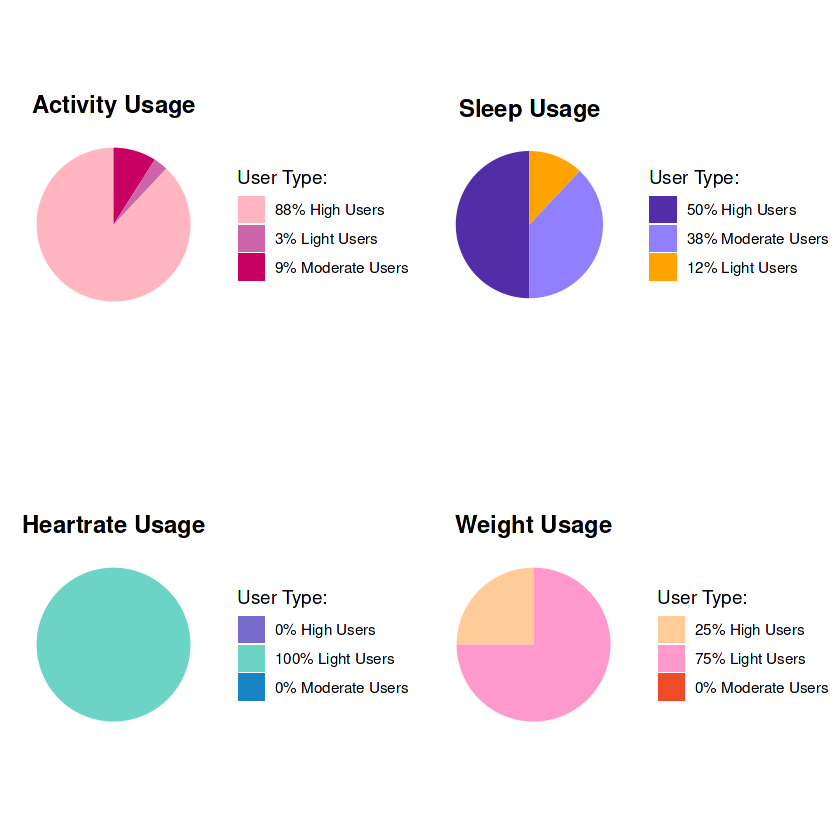

In [82]:
activity_usage_pie <- activity_usage %>%
ggplot(data = activity_usage, mapping=aes(x = "", y = total_percent, fill = use)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#ffb6c1","#cc65a9","#c80064"),
                   labels = c("88% High Users", "3% Light Users", "9% Moderate Users")) +
  labs(title="Activity Usage",
      fill="User Type:")

sleep_usage_pie <- sleep_usage %>%
ggplot(data = sleep_usage, mapping=aes(x = "", y = total_percent, fill = use)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#512da8","#9080ff","#ffa300"),
                   labels = c("50% High Users", "38% Moderate Users", "12% Light Users")) +
  labs(title="Sleep Usage",
      fill="User Type:")

heartrate_usage_pie <- heartrate_usage %>%
ggplot(data = heartrate_usage, mapping=aes(x = "", y = total_percent, fill = use)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#776bcd","#6cd4c5","#1984c5"),
                   labels = c("0% High Users", "100% Light Users", "0% Moderate Users")) +
  labs(title="Heartrate Usage",
      fill="User Type:")

weight_usage_pie <- weight_usage %>%
ggplot(data = weight_usage, mapping=aes(x = "", y = total_percent, fill = use)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#ffcc99","#ff99cc","#EE4B2B"),
                   labels = c("25% High Users", "75% Light Users", "0% Moderate Users")) +
  labs(title="Weight Usage",
      fill="User Type:")

grid.arrange(activity_usage_pie, sleep_usage_pie, heartrate_usage_pie, weight_usage_pie, ncol=2,nrow=2)

> **Question 2: What Proportion of the Day are Individuals tracking Sedentary, Light, Moderate or Very Active Activity?**

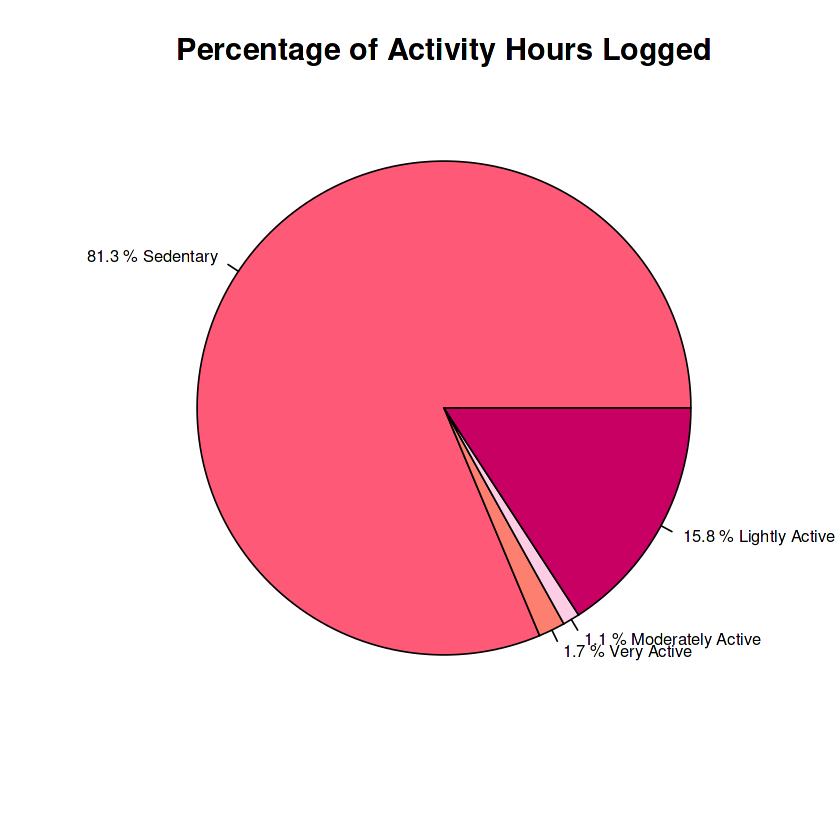

In [83]:
activity_hours_palette <- c("#ff5978","#fd7f6f","#fdcce5","#c80064")
label_hours_size <- 0.8

pie(activity_hours$Total_Hours, 
    labels= paste(activity_hours$Month_Percentage, activity_hours$Hours_Spent),
    main= 'Percentage of Activity Hours Logged',
    cex.main = 1.5, 
    radius = 1.8, 
    border = "black", 
    col = activity_hours_palette, 
    cex = label_hours_size)

> **Question 3: What Days of the Week are Individuals tracking Activity, Sleep, Heartrate and Weight the most?**

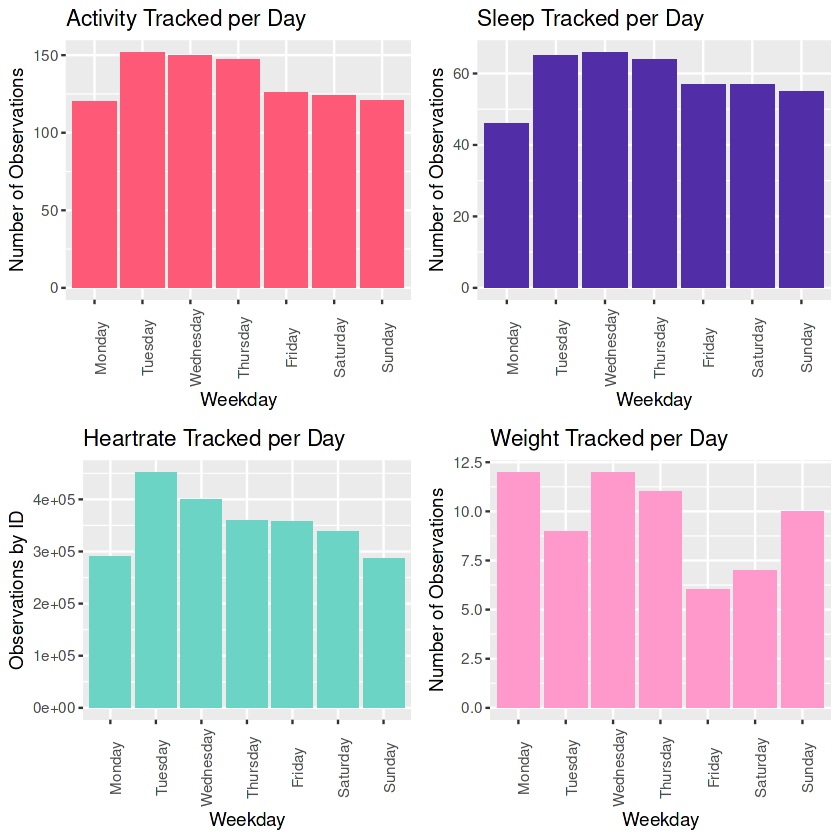

In [84]:
weekdayactivity_bar <- ggplot(data=weekday_activity_use, aes(x=weekday, y=activity_tracked)) + 
geom_bar(stat = "identity", fill='#ff5978') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Activity Tracked per Day", x="Weekday", y="Number of Observations")

weekdaysleep_bar <- ggplot(data=weekday_sleep_use, aes(x=weekday, y=sleep_tracked)) + 
geom_bar(stat = "identity", fill='#512da8') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Sleep Tracked per Day", x="Weekday", y="Number of Observations")

weekdayheartrate_bar <- ggplot(data=weekday_heartrate_use, aes(x=weekday, y=heartrate_tracked)) + 
geom_bar(stat = "identity", fill='#6cd4c5') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Heartrate Tracked per Day", x="Weekday", y="Observations by ID")

weekdayheartrate_bar <- ggplot(data=weekday_heartrate_use, aes(x=weekday, y=heartrate_tracked)) + 
geom_bar(stat = "identity", fill='#6cd4c5') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Heartrate Tracked per Day", x="Weekday", y="Observations by ID")

weekdayweight_bar <- ggplot(data=weekday_weight_use, aes(x=weekday, y=weight_tracked)) + 
geom_bar(stat = "identity", fill='#ff99cc') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Weight Tracked per Day", x="Weekday", y="Number of Observations")

grid.arrange(weekdayactivity_bar, weekdaysleep_bar, weekdayheartrate_bar, weekdayweight_bar)

> **Question 4: What Proportion of Individuals are entering their Heartrate values in the AM versus PM?**

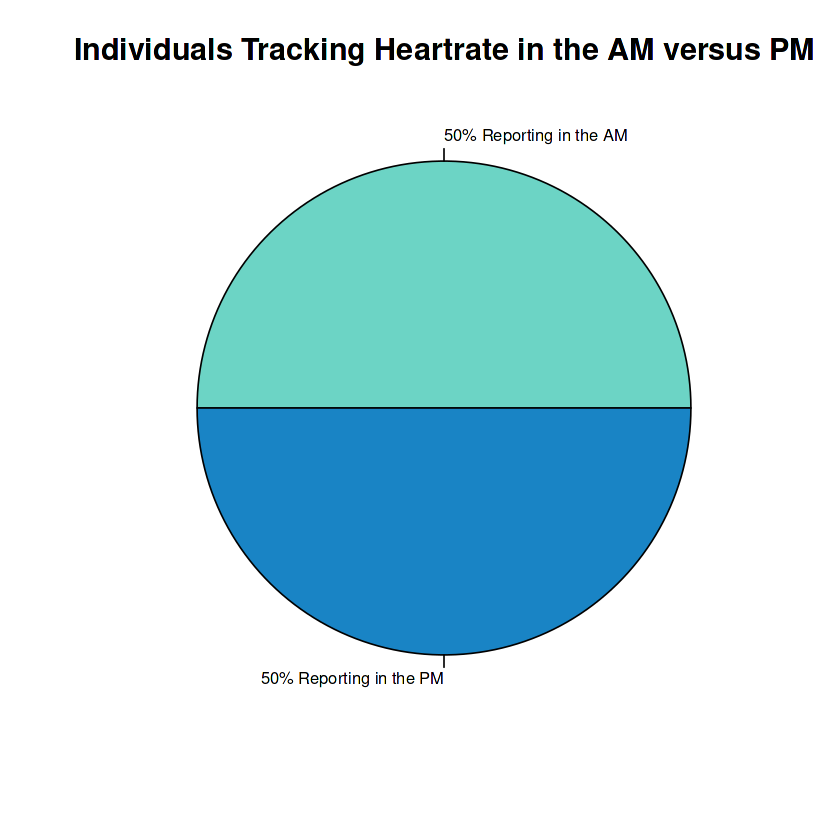

In [85]:
ampmpalette <- c("#6cd4c5", "#1984c5")

pie(heartrateampm$id, 
    labels= c("50% Reporting in the AM", "50% Reporting in the PM"),
    main= 'Individuals Tracking Heartrate in the AM versus PM',
    cex.main = 1.5, 
    radius = 1.8, 
    border = "black", 
    col = ampmpalette,
    cex = label_hours_size)

> **Question 5: What Proportion of Individuals were entering their Weight values manually versus non-Manually?**

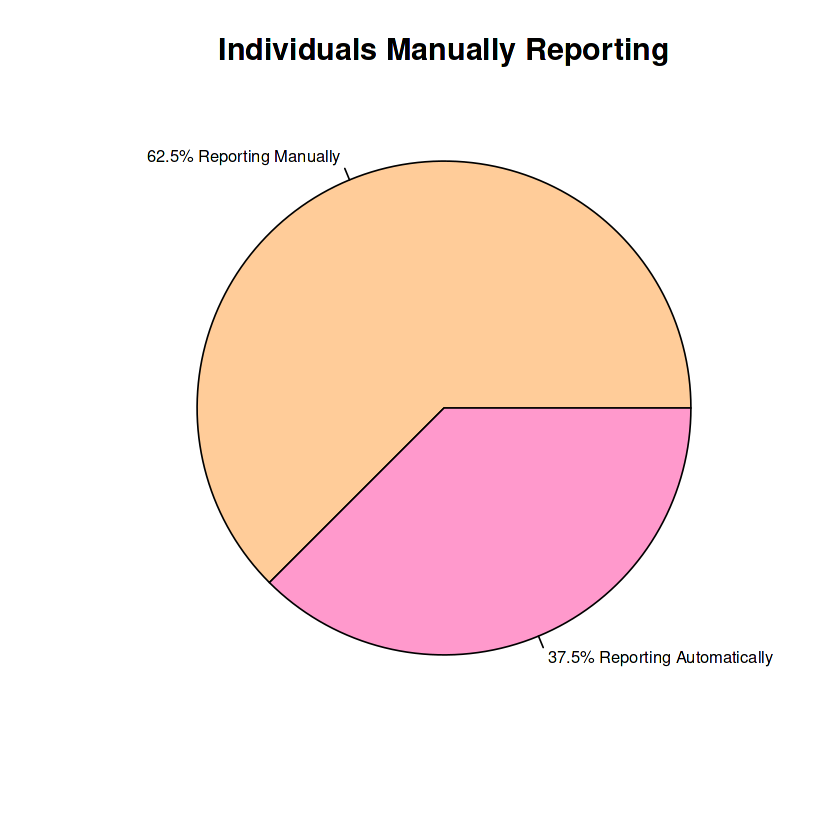

In [86]:
weightreportingpalette <- c("#ffcc99","#ff99cc")

pie(weightreporting$percent, 
    labels= c("62.5% Reporting Manually", "37.5% Reporting Automatically"),
    main= 'Individuals Manually Reporting',
    cex.main = 1.5, 
    radius = 1.8, 
    border = "black", 
    col = weightreportingpalette,
    cex = label_hours_size)

> **Question 6: Are individuals manually entering weight values mostly in the AM or PM?**

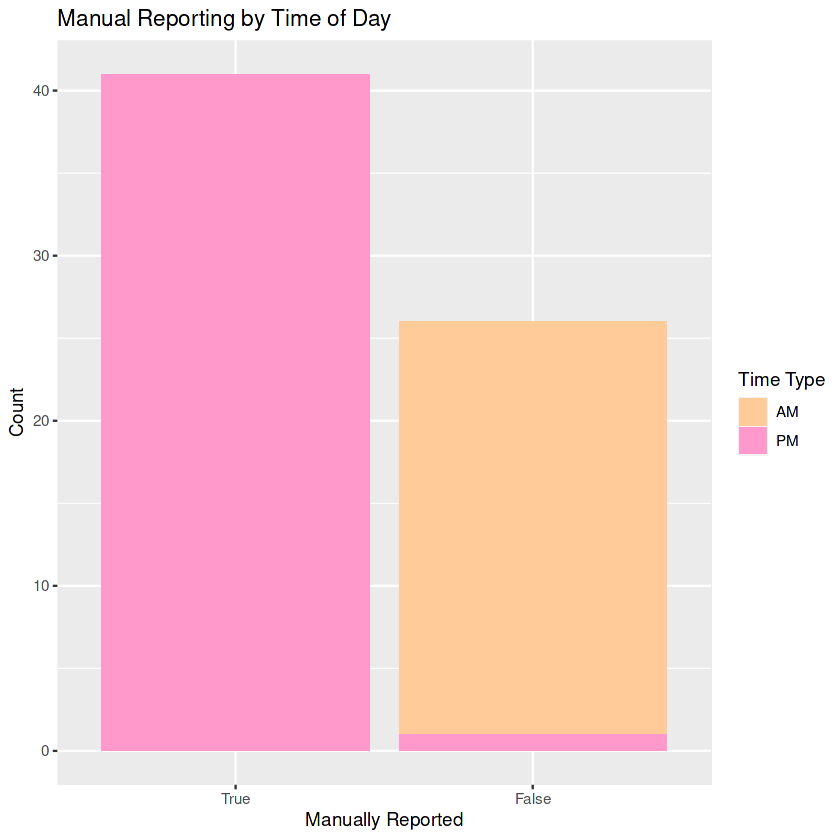

In [87]:
ggplot(weighttime, aes(x = ismanualreport, fill = time_type)) +
  geom_bar() +
scale_fill_manual(values = c("#ffcc99","#ff99cc"),
                   labels = c("AM", "PM")) +
labs(title="Manual Reporting by Time of Day", x="Manually Reported", y="Count", fill="Time Type")

> **Question 7: What Proportion of Weight Observations by ID are entered in the AM versus PM?**

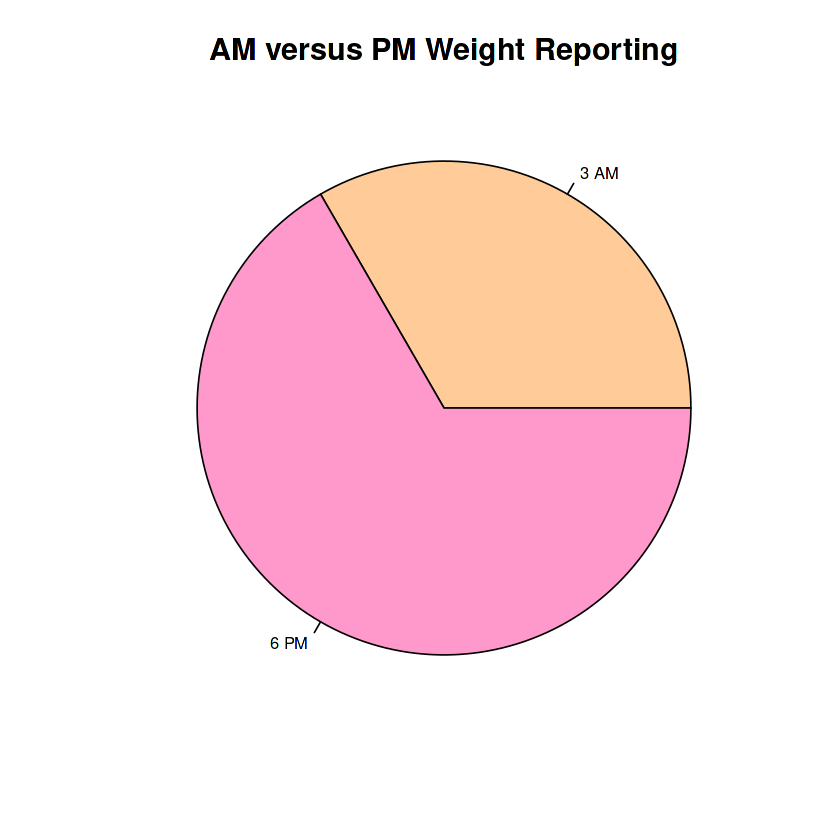

In [88]:
pie(weightampm$percent, 
    labels= paste(weightampm$id, weightampm$time_type),
    main= 'AM versus PM Weight Reporting',
    cex.main = 1.5, 
    radius = 1.8, 
    border = "black", 
    col = weightreportingpalette,
    cex = label_hours_size)

#### **5.5.2. Daily Activity Health Trends:** 

> **Question 1: How Many Times did each Individual meet Step Health Recommendations over the course of the Month?**

> This question did not particular elucidate any revealing trends and therefore any visualizations will be excluded. It was necessary to check if any individuals were particular driving results with the amount of recommendations met, surpassed or not met. 

> **Question 2: On Average, What Percentage of Individuals met Step Health Recommendations over the course of the Month?**

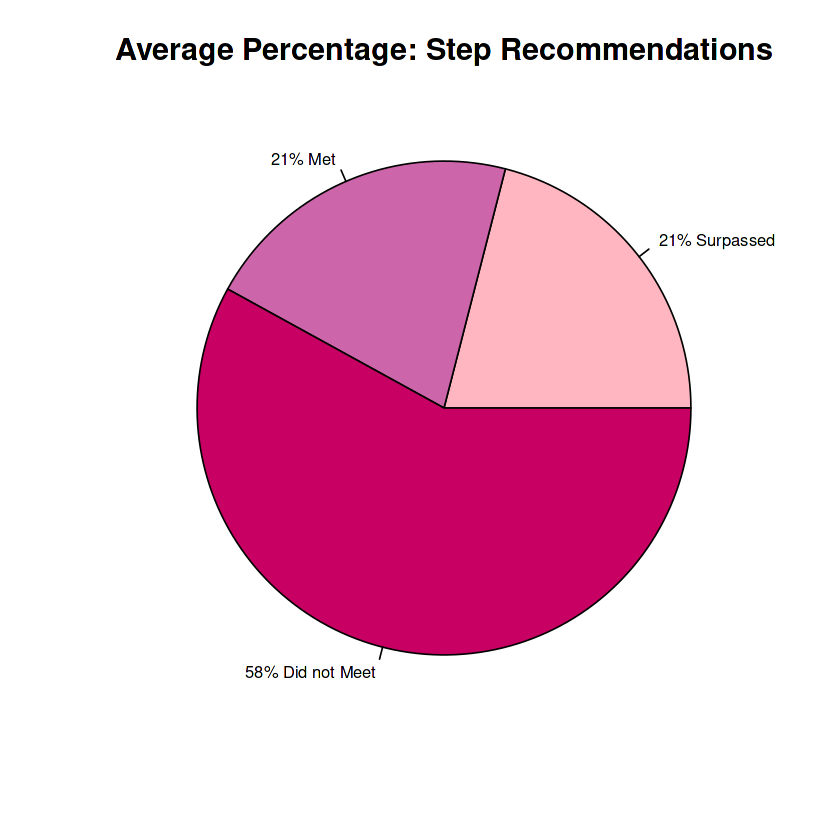

In [89]:
activity_recs_palette <- c("#ffb6c1","#cc65a9","#c80064")

pie(explore_steprecs$sample_percent, 
    labels= c('21% Surpassed', '21% Met', '58% Did not Meet'),
    main= 'Average Percentage: Step Recommendations',
    cex.main = 1.5, 
    radius = 1.8, 
    border = "black", 
    col = activity_recs_palette,
    cex = label_hours_size)

> **Question 3: On Average, What Percentage of Individuals met Activity Health Recommendations over the course of the Month?**

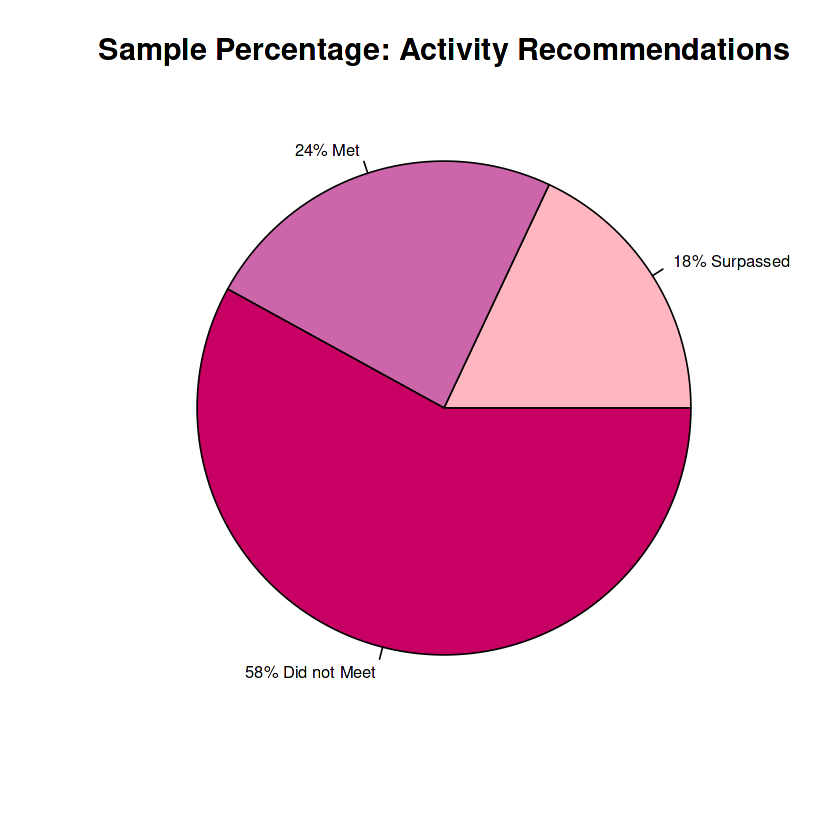

In [90]:
pie(explore_combinedactivity$sample_percent, 
    labels= c('18% Surpassed', '24% Met', '58% Did not Meet'),
    main= 'Sample Percentage: Activity Recommendations',
    cex.main = 1.5, 
    radius = 1.8, 
    border = "black", 
    col = activity_recs_palette,
    cex = label_hours_size)

> **Question 4: On Average, What Days of the Week are Individuals Collectively meeting Health Recommendations?**

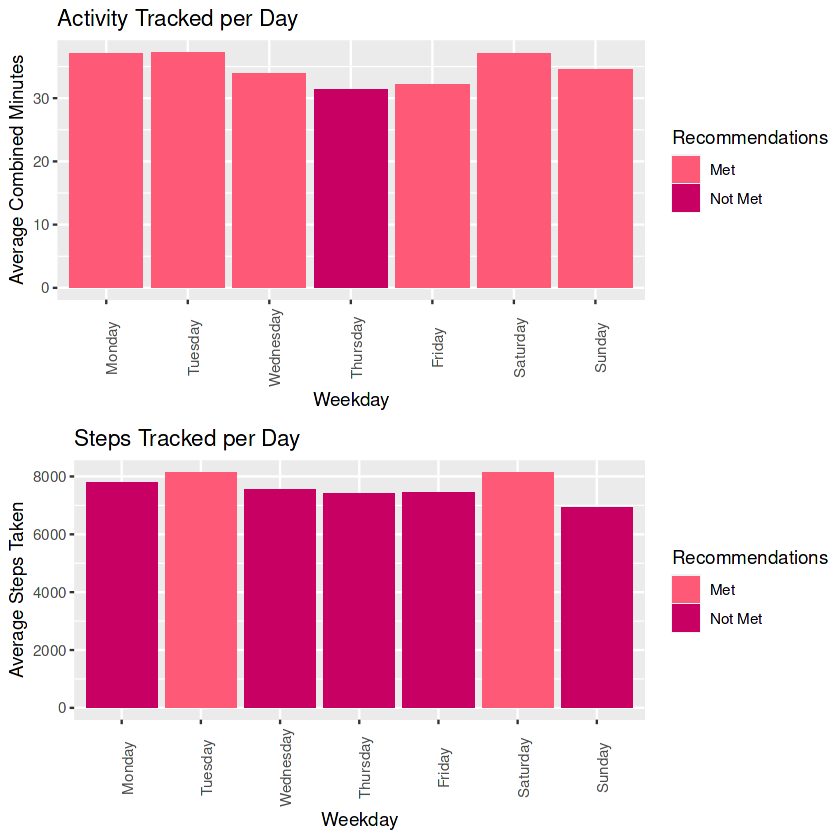

In [91]:
explore_weekdayrecs <- ggplot(data=weekdayhealthrecs, aes(x=weekday, y=avg_combined_active_mins, fill=activity_recommendations)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c('#ff5978', "#c80064"),
                   labels = c("Met", "Not Met")) +
labs(title="Activity Tracked per Day", x="Weekday", y="Average Combined Minutes", fill="Recommendations")

weekdaysteprecs <- ggplot(data=weekdayhealthrecs, aes(x=weekday, y=avg_steps, fill=step_recommendations)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c('#ff5978', "#c80064"),
                   labels = c("Met", "Not Met")) +
labs(title="Steps Tracked per Day", x="Weekday", y="Average Steps Taken", fill="Recommendations")

grid.arrange(explore_weekdayrecs, weekdaysteprecs, ncol=1, nrow=2)

#### **5.5.3. Daily Sleep Health Trends:** 

> **Question 1: On Average, How Many Individuals had a Poor, Optimal or Normal Sleep?**

> The visualization code utilised is as below:

In [92]:
sleep_trends <- exploresleeprecs %>%
ggplot(data = exploresleeprecs, mapping=aes(x = "", y = sample_percent, fill = sleep_recs)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#512da8","#9080ff","#ffa300"),
                   labels = c("42% Moderate Sleepers", "0% Optimal Sleepers", "58% Poor Sleepers")) +
  labs(title="Optimal, Moderate or Poor Sleepers on Average?",
      fill="Sleep Recommendations:")

> **Question 2: On Average, How Many Individuals have a Short, Long or Normal Awake Time?**

> The visualization code utilised is as below:

In [93]:
awake_trends <- exploreawaketype %>%
ggplot(data = exploreawaketype, mapping=aes(x = "", y = sample_percent, fill = awake_recs)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#512da8","#9080ff","#ffa300"),
                   labels = c("13% Long Awake Time", "4% Normal Awake Time", "83% Short Awake Time")) +
  labs(title="Short, Normal or Long Awake Time on Average?",
      fill="Awake Time Recommendations:")

> **Question 3: On Average, How Many Individuals have Healthy or Unhealthy Sleep Efficiency?**

> The following code was used to create a visualisation:

In [94]:
efficiency_trends <- explore_efficiency %>%
ggplot(data = explore_efficiency, mapping=aes(x = "", y = sample_percent, fill = efficiency_recs)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#512da8","#ffa300"),
                   labels = c("92% Healthy Efficiency","8% Unhealthy Efficiency")) +
  labs(title="Healthy or Unhealthy Sleep Efficiency on Average?",
      fill="Efficiency:")

> The following visualizations were created for all three questions above:

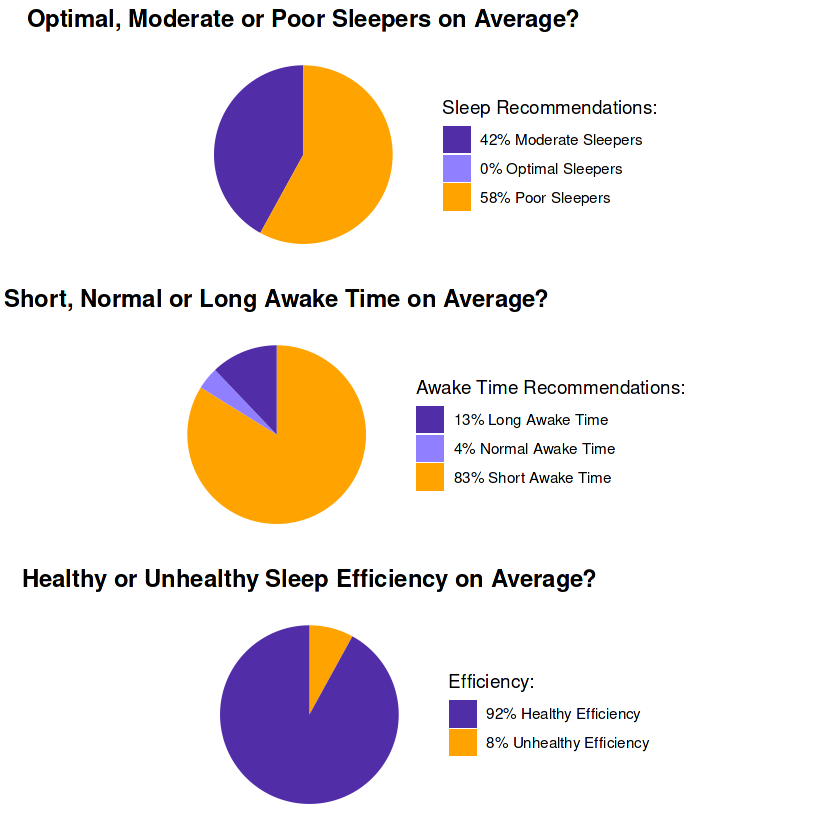

In [95]:
grid.arrange(sleep_trends, awake_trends, efficiency_trends)

> **Question 4: On Average, What Days of the Week are Individuals Collectively meeting Sleep Health Recommendations?**

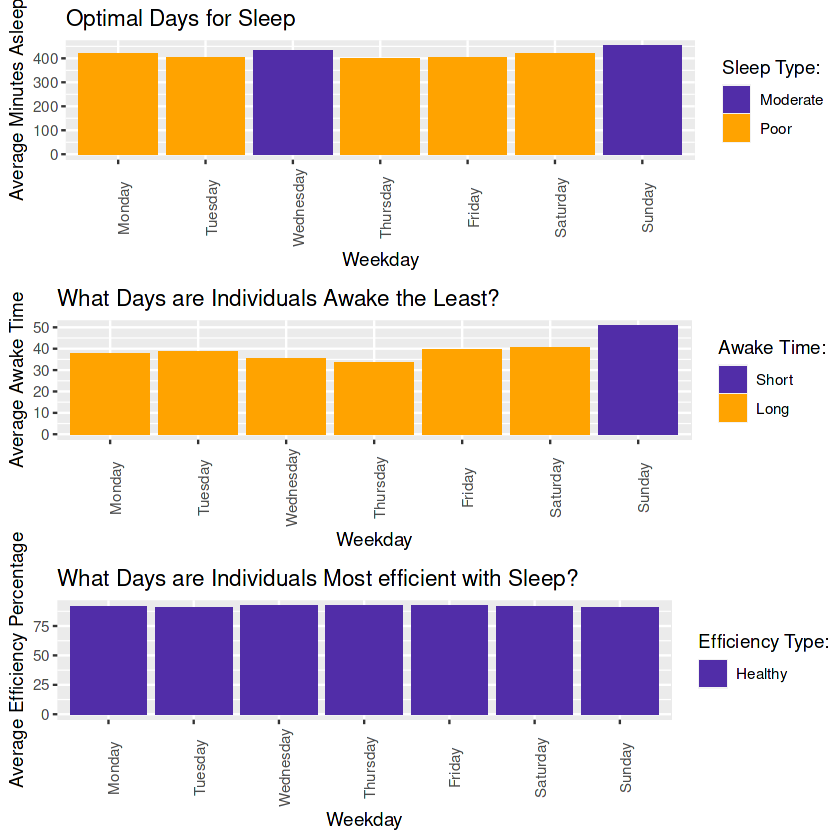

In [96]:
weekdaysleeprecs <- ggplot(data=sleeprecs, aes(x=weekday, y=avg_minutesasleep, fill=sleep_type)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c("#512da8","#ffa300"),
                   labels = c("Moderate", "Poor")) +
labs(title="Optimal Days for Sleep", x="Weekday", y="Average Minutes Asleep", fill="Sleep Type:")

weekdayawakerecs <- ggplot(data=sleeprecs, aes(x=weekday, y=avg_awake, fill=awake_type)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c("#512da8","#ffa300"),
                   labels = c("Short", "Long")) +
labs(title="What Days are Individuals Awake the Least?", x="Weekday", y="Average Awake Time", fill="Awake Time:")

weekdayefficiencyrecs <- ggplot(data=sleeprecs, aes(x=weekday, y=avg_efficiency, fill=efficiency_type)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c("#512da8"),
                   labels = c("Healthy")) +
labs(title="What Days are Individuals Most efficient with Sleep?", x="Weekday", y="Average Efficiency Percentage", fill="Efficiency Type:")

grid.arrange(weekdaysleeprecs,weekdayawakerecs,weekdayefficiencyrecs, nrow=3)

#### **5.5.4. Daily Heartrate Health Trends:** 

> **Question 1: On Average, How Many Individuals had a Low, High or Normal Heartrate?**

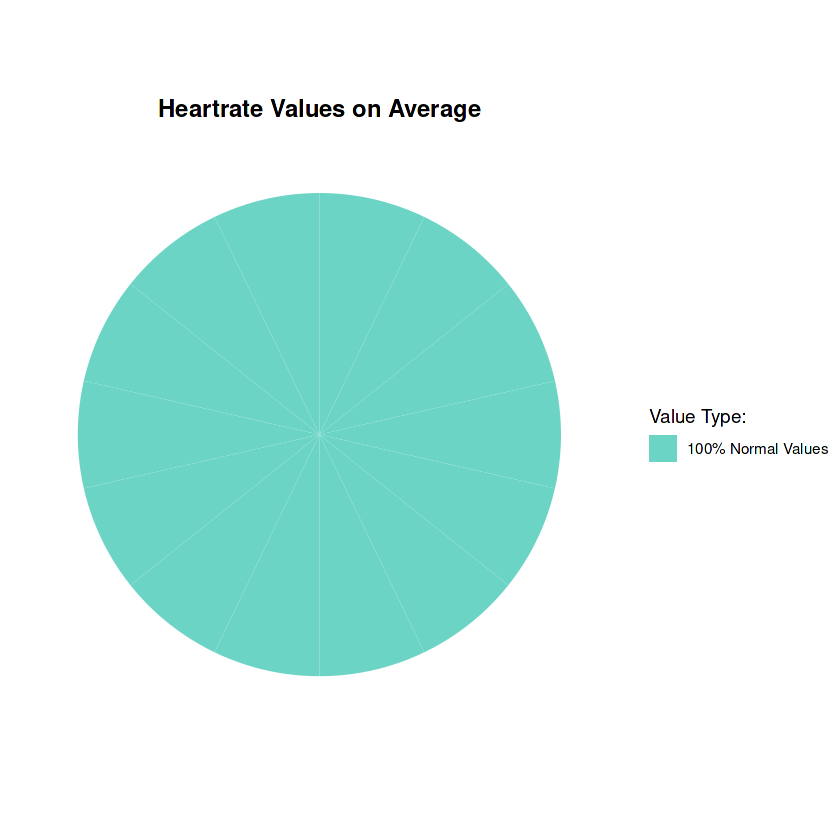

In [97]:
heartrate_recs_pie <- heartraterecs %>%
ggplot(data = heartraterecs, mapping=aes(x = "", y = "", fill = value_type)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#6cd4c5"),
                   labels = c("100% Normal Values")) +
  labs(title="Heartrate Values on Average",
      fill="Value Type:")

heartrate_recs_pie

> **Question 2: On Average, What days of the Week are Individuals most stressed?**

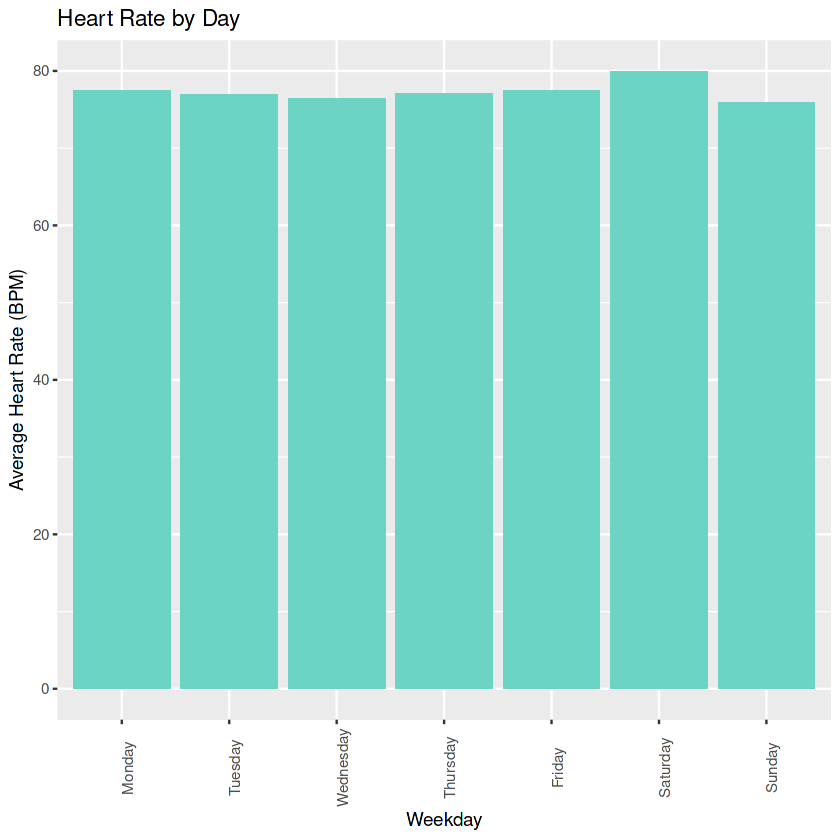

In [98]:
heartrateweekdaybar <- ggplot(data=heartrateweekday, aes(x=weekday, y=avg_value)) + 
geom_bar(stat = "identity", fill='#6cd4c5') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Heart Rate by Day", x="Weekday", y="Average Heart Rate (BPM)")

heartrateweekdaybar

> **Question 3: On Average, What time of the Day were Individuals most Stressed?**

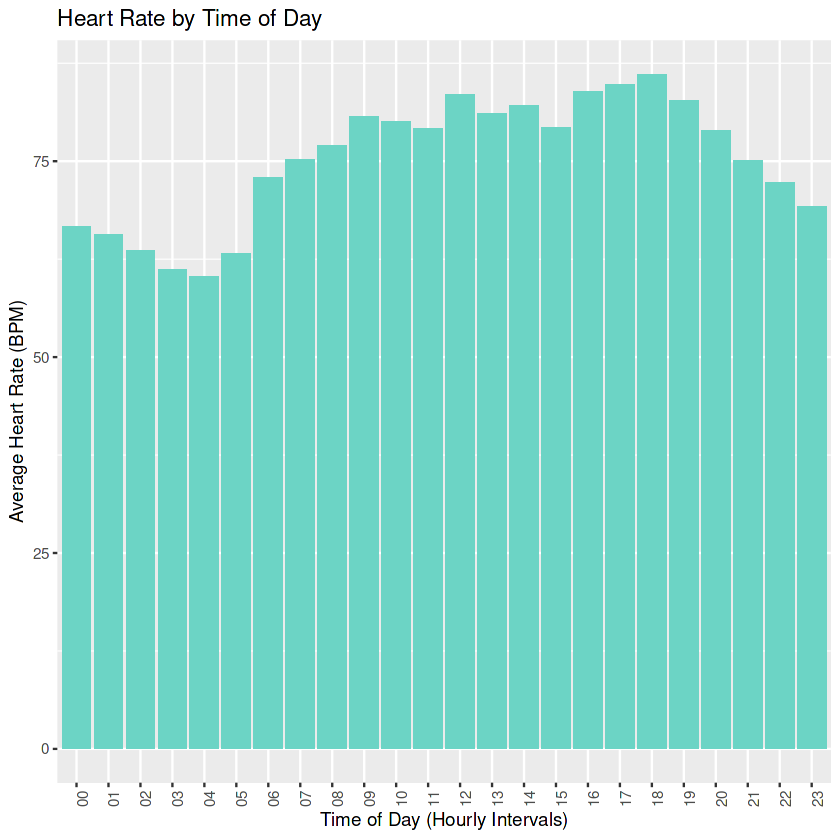

In [99]:
heartratetimebar <- ggplot(data=heartratetime, aes(x=time, y=mean_value)) + 
geom_bar(stat = "identity", fill='#6cd4c5') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Heart Rate by Time of Day", x="Time of Day (Hourly Intervals)", y="Average Heart Rate (BPM)")

heartratetimebar

#### **5.5.5. Daily Weight Health Trends:** 

> **Question 1: On Average, How Many Individuals had a Healthy, Underweight or Overweight BMI type?**

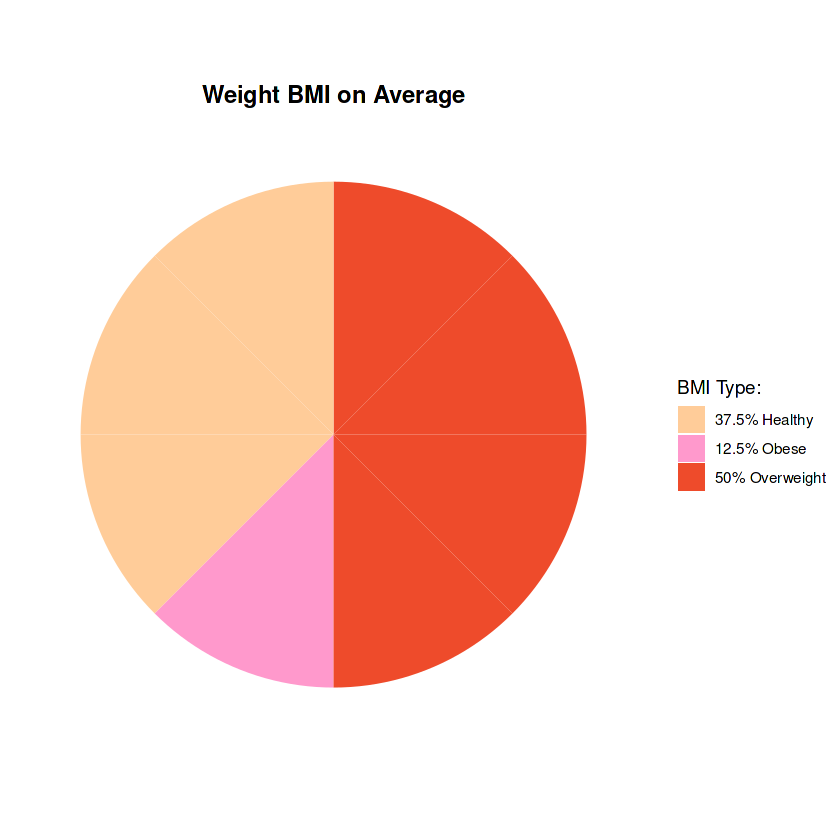

In [100]:
bmi_pie <- bmirecs %>%
ggplot(data = bmirecs, mapping=aes(x = "", y = "", fill = bmi_type)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#ffcc99","#ff99cc","#EE4B2B"),
                   labels = c("37.5% Healthy", "12.5% Obese", "50% Overweight")) +
  labs(title="Weight BMI on Average",
      fill="BMI Type:")

bmi_pie

#### **5.5.6. Wear Trends:** 

> **Question 1: On Average, how many minutes did individuals wear their tracking device when undergoing activity?**

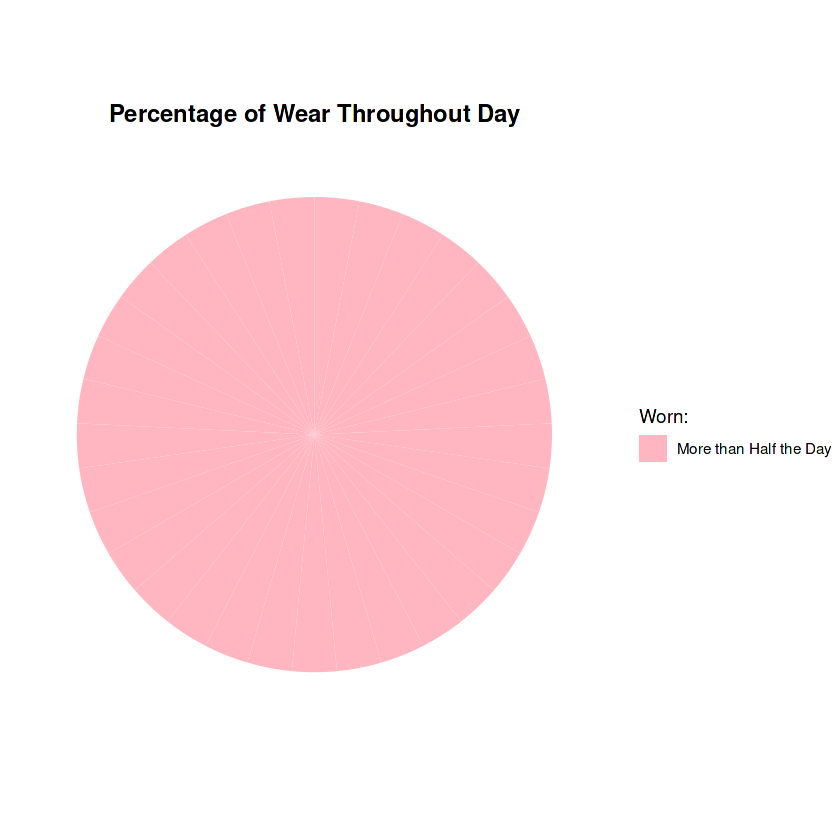

In [101]:
ggplot(data = activitywear_avg, mapping=aes(x = "", y = "", fill = worn)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#ffb6c1"),
                   labels = c("More than Half the Day")) +
  labs(title="Percentage of Wear Throughout Day",
      fill="Worn:")

> **Question 2: On Average, how many minutes did individuals wear their tracking device when undergoing sleep?**


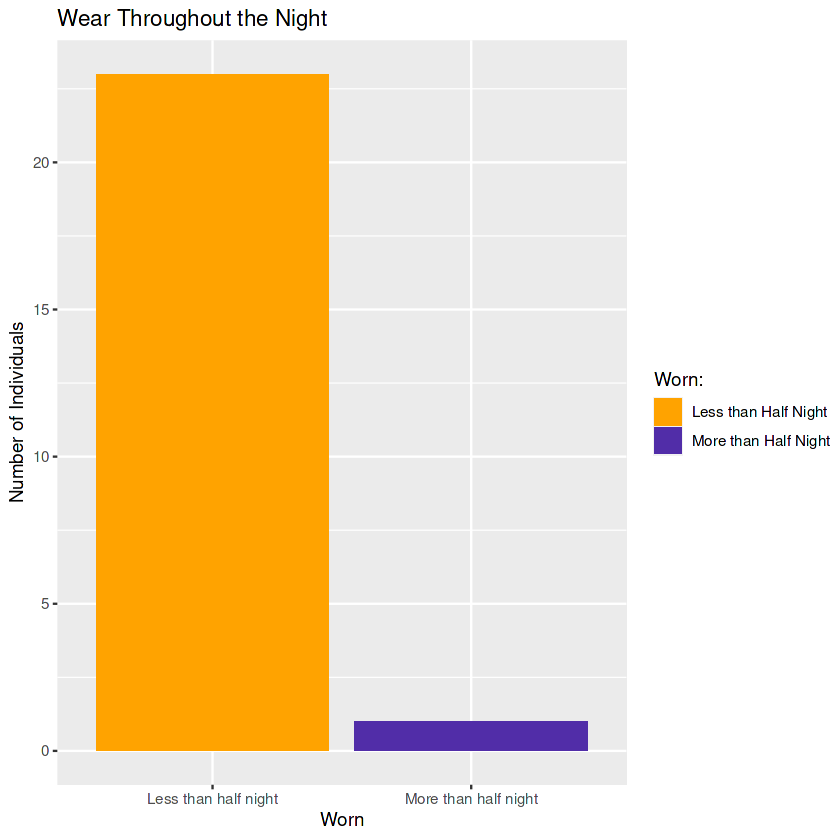

In [102]:
ggplot(sleepwear_avg, aes(x = worn, fill =worn)) +
  geom_bar() +
  scale_fill_manual(values = c("#ffa300","#512da8"),
                   labels = c("Less than Half Night", "More than Half Night")) +
labs(title="Wear Throughout the Night", x="Worn", y="Number of Individuals", fill="Worn:")

> **Question 3: What Percentage of Observations met criteria for Individuals' wearing their device All day, more than half day, less than half day or around half a day?**

> **Question 4: What Percentage of Observations met criteria for Individuals' wearing their device All night, more than half night, less than half night or around half a night?**

> These two questions will be regarded together: 

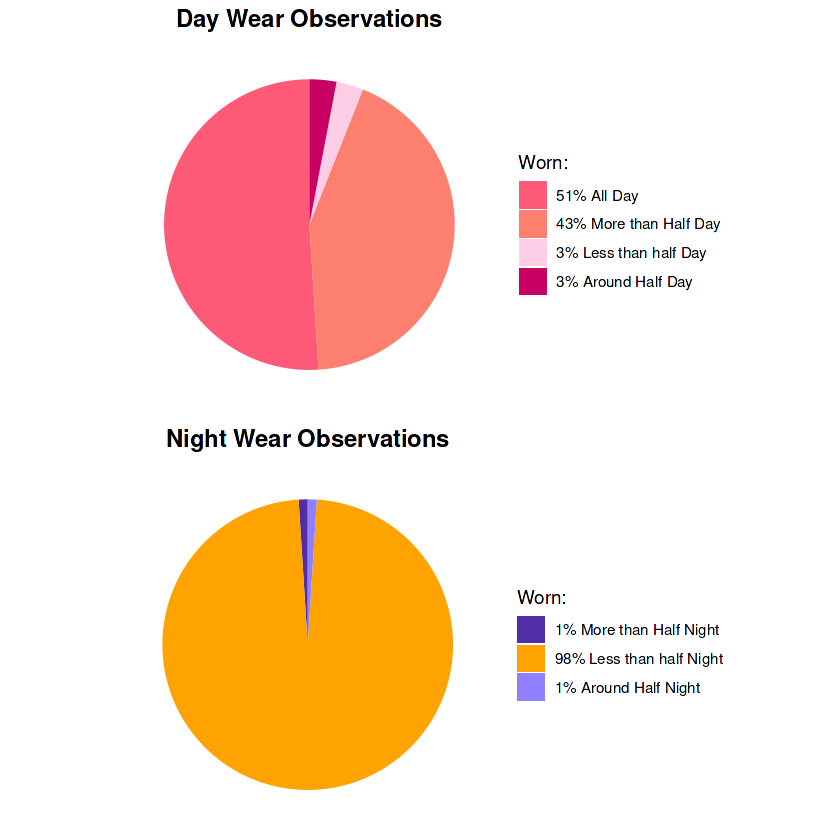

In [103]:
activity_worn_pie <- activity_worn %>%
ggplot(data = activity_worn, mapping=aes(x = "", y = total_percent, fill = worn)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#ff5978","#fd7f6f","#fdcce5","#c80064"),
                   labels = c("51% All Day", "43% More than Half Day", "3% Less than half Day", "3% Around Half Day")) +
  labs(title="Day Wear Observations",
      fill="Worn:")

sleep_worn_pie <- sleep_worn %>%
ggplot(data = sleep_worn, mapping=aes(x = "", y = total_percent, fill = worn)) + 
  geom_bar(stat = "identity")  +
  coord_polar("y") +
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#512da8","#ffa300","#9080ff"),
                   labels = c("1% More than Half Night","98% Less than half Night","1% Around Half Night")) +
  labs(title="Night Wear Observations",
      fill="Worn:")

grid.arrange(activity_worn_pie,sleep_worn_pie)

> **Question 5: Do Wearable Trends impact Sleep Quality Overall?**


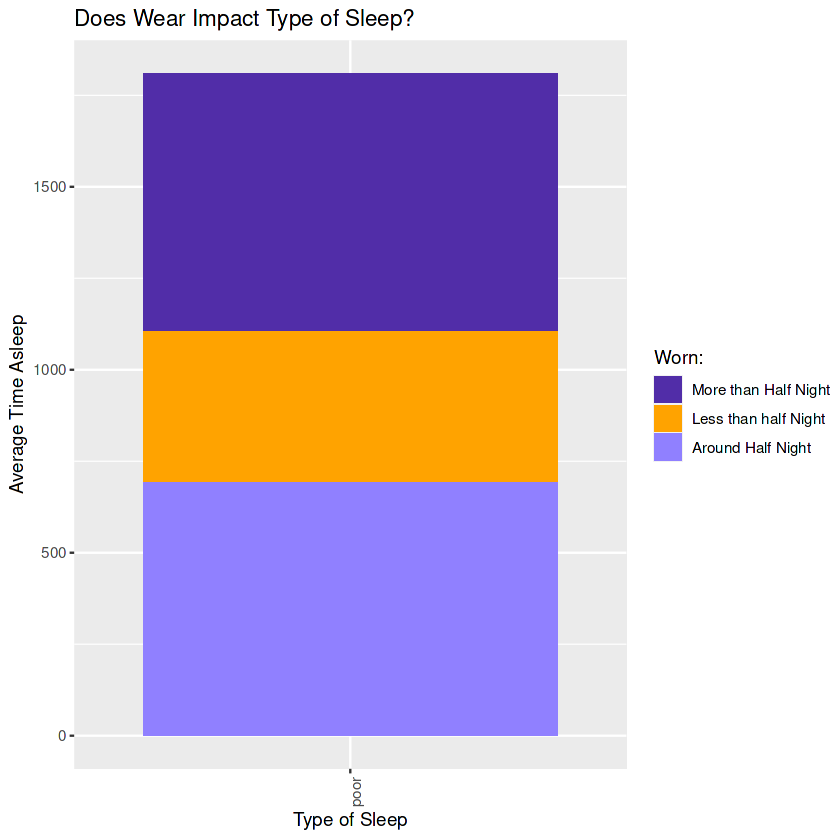

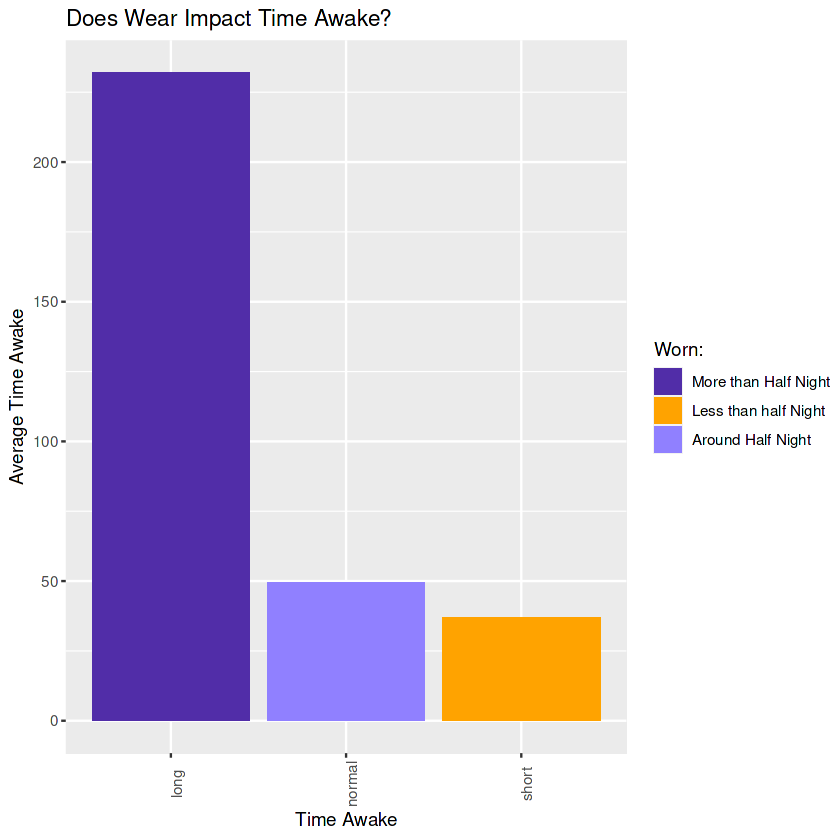

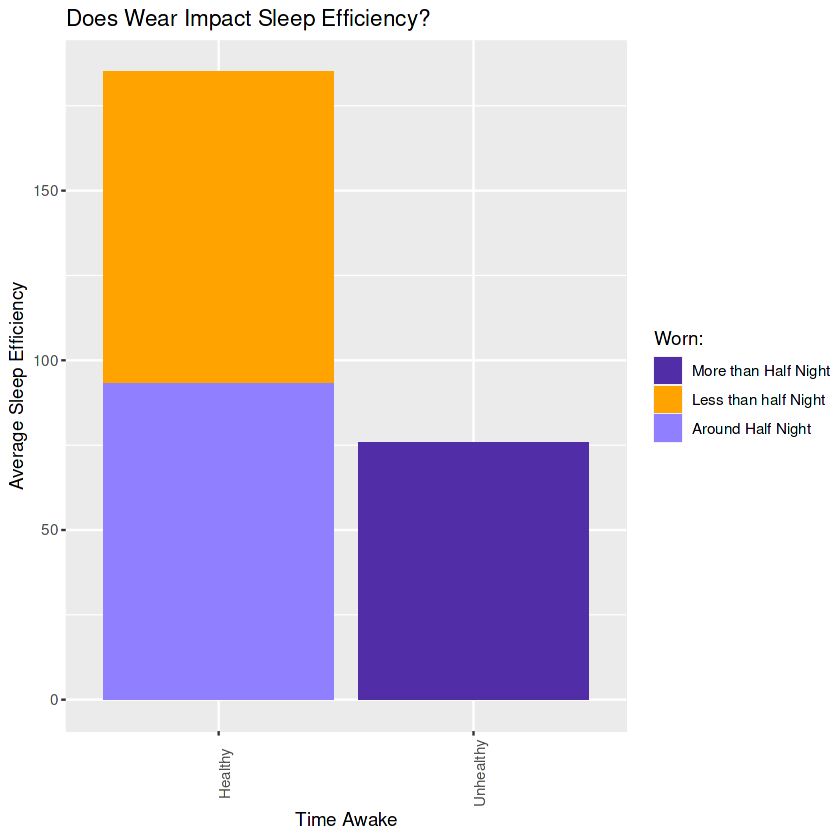

In [104]:
ggplot(data=wearsleepimpact, aes(x=sleep_type, y=avg_minutesasleep, fill=worn)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c("#512da8","#ffa300","#9080ff"),
                   labels = c("More than Half Night","Less than half Night","Around Half Night")) +
labs(title="Does Wear Impact Type of Sleep?", x="Type of Sleep", y="Average Time Asleep", fill="Worn:")

ggplot(data=wearsleepimpact, aes(x=awake_type, y=avg_timeawake, fill=worn)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c("#512da8","#ffa300","#9080ff"),
                   labels = c("More than Half Night","Less than half Night","Around Half Night")) +
labs(title="Does Wear Impact Time Awake?", x="Time Awake", y="Average Time Awake", fill="Worn:")

ggplot(data=wearsleepimpact, aes(x=efficiency_type, y=avg_efficiency, fill=worn)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c("#512da8","#ffa300","#9080ff"),
                   labels = c("More than Half Night","Less than half Night","Around Half Night")) +
labs(title="Does Wear Impact Sleep Efficiency?", x="Time Awake", y="Average Sleep Efficiency", fill="Worn:")

> **Question 6: What days of the week are individuals wearing their devices for activity the most?**

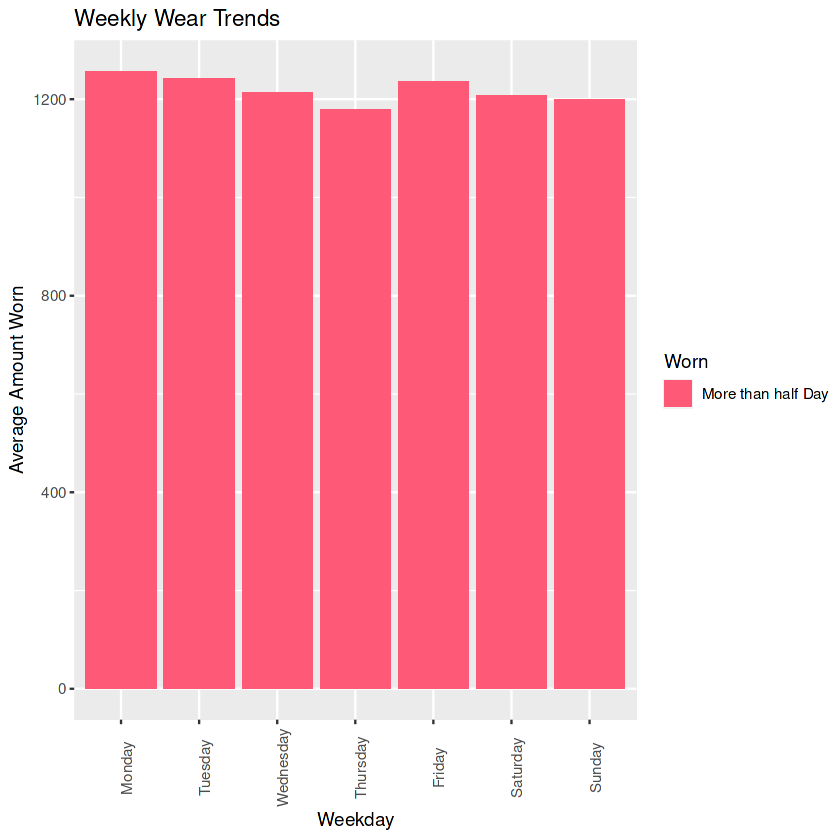

In [105]:
ggplot(data=weekdayactivitywear, aes(x=weekday, y=avg_total_minutes_worn, fill=worn)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c('#ff5978'),
                   labels = c("More than half Day")) +
labs(title="Weekly Wear Trends", x="Weekday", y="Average Amount Worn", fill="Worn")

> **Question 7: What days of the week are individuals wearing their devices for sleep the most?**

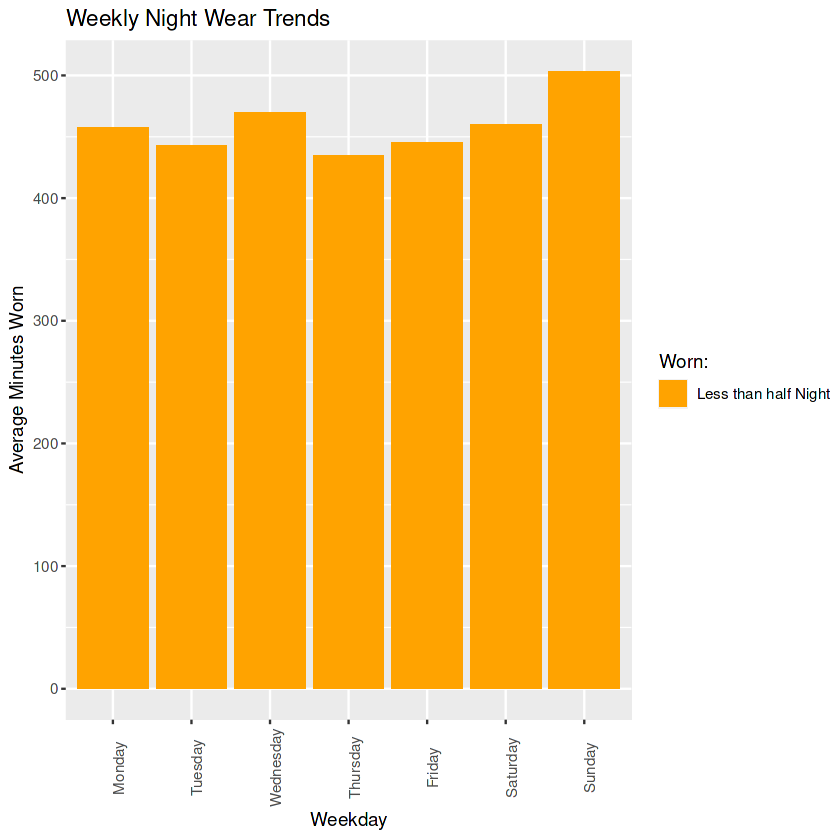

In [106]:
ggplot(data=weekdaysleepwear, aes(x=weekday, y=avg_total_minutes_worn, fill=worn)) + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_manual(values = c("#ffa300"),
                   labels = c("Less than half Night")) +
labs(title="Weekly Night Wear Trends", x="Weekday", y="Average Minutes Worn", fill="Worn:")

## **Phase VI: Acting Phase**

### **6.1. Summary of Analysis:**
This summary is based on the visualizations created:

#### **6.1.1. App-Use Trends:**
* **Visualisation 1:** Most individuals utilised the device for tracking activity (with 88% classified as High Users). Even though only 8 individuals had utilised the weight features overall, all individuals who utilised the heartrate features, were considered light users in comparison to weight users (with 25% at least being classified as high users). This means individuals utilised weight features more consistently than heartrate features even though more individuals were intrigued in tracking their heartrate. 
* **Visualisation 2:** Most of the hours logged from tracking activity were sedentary hours, followed by Lightly active activity (15.8% of hours logged). 
* **Visualisation 3:** Tuesday appeared to be the most consistent day of the week in which individuals tracked activity, sleep and heartrate. However, this was not true for weight. Weight was tracked the most either on Mondays or Wednesdays.
* **Visualisation 4:** An equal proportion of individuals reported heartrate values both in the AM and PM
* **Visualisation 5:** Most individuals reported their weight manually (62.5% versus 37.5% reporting automatically). 
* **Visualisation 6:** Most reported values for weight were manually reported in the PM in comparison to the AM where automatic recording occurred (with the exception of 1 observation). 
* **Visualisation 7:** 6 individuals tracked their weight in the PM, in comparison to 3 individuals who tracked their weight in the AM. 

#### **6.1.2. Health Trends:**
* **Visualisation 1:** On average, most individuals did not meet step recommendations (58%). However, an equal amount had met and surpassed step recommendations (21% respectively for both) 
* **Visualisation 2:** On average, most individuals did not meet activity recommendations (58%). However, more individuals met recommendations (24%) than surpassed recommendations (18%). 
* **Visualisation 3:** The only day individuals collectively did not meet activity recommendations was on Thursday. However, individuals collectively only met step recommendations on Tuesdays and Saturdays. 
* **Visualisation 4:** The majority of the sample consisted of poor sleepers (58%). No individual was considered an optimal sleeper. Most of the sample had short times awake (83%) followed by a long time awake (13%). Additionally, the majority of the sample had an efficient sleep (92%). 
* **Visualisation 5:** The only days in which individuals collectively had moderate sleep was on Wednesday and Sunday. Most days, with the exception of Sunday, individuals spent a long time awake. Nevertheless, it appears individuals had a healthy efficient sleep across the week. 
* **Visualisation 6:** All individuals exhibited normal heartrate values on average. 
* **Visualisation 7:** Despite normal heartrate values, it appears that individuals were most likely to be stressed on Saturdays. 
* **Visualisation 8:** Despite normal heartrate values, individuals were more likely to be stressed in the afternoon (around 6pm). 
* **Visualisation 9:** The majority of the sample consisted of individuals with an overweight BMI classification (50%), followed by a healthy BMI classification (37.5%). 

#### **6.1.3. Wear Trends:**
* **Visualisation 1:** All individuals wore their device for more than half the day when tracking activity.
* **Visualisation 2:** Most individuals wore their device for less than half the night when tracking sleep (with the exception of 1 individual).
* **Visualisation 3:** When eliciting further detail, it is noticeable there were no observations for individuals wearing their device all night. However, it is noticeable that most individuals wore their device either all day or more than half a day, with a collective 94% of observations collated. 
* **Visualisation 4:** Whether individuals wore their device more than half the night, less than half night or around half the night, all individuals had poor sleep. 
* **Visualisation 5:** Interestingly, the more individuals wore their device at night, the longer the individuals spent awake. 
* **Visualisation 6:** Similarly, if individuals wore their device for less than or around half the night, they were classified as having an efficient sleep. However, if they wore their device for more than half the night, individuals were determined to have an unhealthy sleep efficiency. 
* **Visualisation 7:** Individuals wore their devices for activity the most on Mondays and Fridays. They were least likely to wear their device on Thursdays. 
* **Visualisation 8:** Individuals wore their devices the most for sleep on Sunday. However, likewise to activity tracking, they were least likely to wear their device on Thursdays. 

### **6.2. Recommendations and Potential Insights for Bellabeat:**
Based on the trends and findings from the data on app-use, health, and wear patterns, here are several strategies Bellabeat can apply to increase the sales of their devices:

1. Enhancing Features for Key Health Metrics
Weight Tracking: Despite fewer users utilizing weight tracking, those who do are more consistent compared to heart rate users. Bellabeat can develop smart scales or integrated weight management systems that sync effortlessly with the app, providing additional insights like body fat percentage and muscle mass. Market the weight tracking feature more, as it seems to have consistent engagement potential.

Marketing Strategy: Highlight weight-tracking benefits, such as improved BMI insights, progress reports, and personalized recommendations, to attract health-conscious individuals.
Heart Rate Features: Although heart rate tracking was popular, users weren’t as consistent. To increase engagement, Bellabeat could introduce guided stress-relief features based on heart rate variability. Since stress was higher on Saturdays and in the evenings, Bellabeat could push stress-relief notifications or breathing exercises at these times.

Marketing Strategy: Promote this feature by emphasizing mental well-being and stress management, a growing concern for many users.

2. Improving User Engagement and Habit Formation
Activity Tracking and Goals: Many users did not meet step and activity recommendations, with Thursday being the least active day. Bellabeat could introduce gamification elements like daily challenges, weekly milestones, and personalized reminders to motivate users to stay active, particularly on low-activity days.

Marketing Strategy: Run campaigns encouraging users to compete with friends or earn rewards for completing challenges. A “Move More on Thursdays” initiative could nudge users to be more active on this day.
Sleep Tracking: Most users wore their devices for less than half the night, yet those who wore them longer had poorer sleep efficiency. Since sleep is a critical health aspect, Bellabeat could introduce improved, more comfortable wearables for night use (like softer straps or lightweight models) and provide actionable insights on improving sleep quality.

Marketing Strategy: Advertise better sleep insights by focusing on sleep efficiency and how Bellabeat can help users improve their rest patterns. Partnering with sleep experts or offering sleep coaching via the app could be a valuable service to differentiate Bellabeat from competitors.

3. Leverage Time-Specific Trends for Customization and Personalization
Personalized Notifications: Based on the trends, activity was tracked most consistently on Tuesdays, weight was tracked more on Mondays/Wednesdays, and stress was higher on Saturdays. Bellabeat could send custom reminders for weight tracking at the start of the week and promote stress-relief features on weekends.

Marketing Strategy: Emphasize the app’s ability to deliver time-sensitive recommendations based on personal patterns. For example, promote campaigns like “Mid-Week Check-in” for weight tracking and “Saturday Stress Management” for heart rate tracking.
Optimized Tracking Windows: Since many users manually reported their weight in the evening and wore their device more during the day, Bellabeat could push for automated syncing features in the evening (around weight tracking) and morning (for activity tracking) to better match user behavior.

Marketing Strategy: Promote the app’s ease of use and accurate, automatic syncing features as part of a seamless experience. Offering discounts or subscription-based add-ons for users who want enhanced data insights could help boost sales.

4. Wearable Comfort and Usability Improvements
Device Comfort for Sleep: Most users wore their devices more during the day but not for long during sleep. Improving the design for nighttime wear could encourage more users to utilize sleep tracking. For instance, lighter, more ergonomic designs or wearables specifically designed for night use would increase adoption.

Marketing Strategy: Introduce a new line of comfortable sleep-focused wearables. Highlight these as essential tools for improving sleep quality, emphasizing poor sleep as a common problem that Bellabeat can help solve.
User-Friendly Integration: Since many users logged weight manually, automating more features (like weight tracking or sleep insights) could ease device use. Integrating Bellabeat with smart home devices, voice assistants, or health apps (e.g., Apple Health, Google Fit) can streamline data tracking, offering a more hands-off experience.

Marketing Strategy: Focus on the ease of integration with other popular health apps and smart devices, making Bellabeat the go-to choice for tech-savvy, health-conscious consumers.

5. Incentivizing Consistent Use
Subscription Model for Premium Insights: Bellabeat could introduce a subscription service for premium features like advanced sleep analytics, stress monitoring, and personalized health coaching. Users could receive additional benefits, such as insights into the best times for activity and tips for improving sleep or managing stress.
Marketing Strategy: Offer a free trial of premium services and promote this through targeted campaigns. Position Bellabeat as a holistic health platform offering more than just a wearable.

6. Promoting Device Usage with Community Engagement
Community and Social Engagement: Given that users wore their devices more on Mondays and Fridays for activity, Bellabeat could introduce weekly fitness challenges, social sharing features, and community-driven rewards that encourage users to wear the device more often.
Marketing Strategy: Utilize social media platforms to create challenges and invite users to share their progress. A referral program offering discounts on devices or premium services could further boost sales through word-of-mouth marketing.

7. Addressing BMI and Activity Levels
Target Weight and BMI Management: With 50% of users classified as overweight, Bellabeat could target individuals looking for weight management solutions. By introducing personalized weight loss programs or partnerships with nutrition and fitness apps, Bellabeat can offer a holistic approach to health.
Marketing Strategy: Market the product to individuals concerned with weight loss, promoting its ability to track progress and give actionable recommendations based on BMI and activity levels.
Conclusion
By focusing on product usability, feature expansion, and leveraging data-driven insights, Bellabeat can significantly increase user engagement and sales. Improving the overall user experience through personalized notifications, better sleep tracking, stress management, and integration with other health platforms will allow Bellabeat to stand out in the competitive wearable market.